#  AIRBNB PRICE PREDICTION           
## Data Science Project
### Author: Varsha Rajan
#### Date: Apr 15, 2024

### Overveiw

Airbnb, the world leader in accommodations of the “sharing economy”, allows you to find places to stay directly from individuals in thousands of cities around the world. 

The Airbnb industry is becoming more and more competitive, so it's critical for hosts to deliver exceptional services. To do this, we must comprehend the factors that affect the rental price.

**What dictates Airbnb rental price?** Is it the

- Number of beds?
- Number of guests allowed?
- Review score?
- Cancellation policy?

### Table Of Content

1. Introduction and project aims
2. The dataset
3. Cleaning and pre-processing
4. Exploratory data analysis
 - Numerical features
 - Categorical features
 - Correlation Matrix
5. Preparing the data for modeling
6. Linear Regression
7. Random Forest Regressor
8. Neural Network
9. Conclusion & Recomendations

### Dataset

I am planning to focus on USA locations. The dataset I am using here is downloaded from kaggle. It has **74111 rows** and **29 columns** which includes many features such as: number of beds, number of guests allowed, description, number of reviews, and many more.

### Data Dictionary

 - `id` : Unique identifier for each Airbnb listing. (int64)
  - `log_price` : Logarithm of the price of the listing. It's common to use the logarithm to handle skewed price distributions. (float64)
  - `property_type` : Type of property. (object)
  - `room_type` : Type of room available. (object)
  - `amenities` : List of amenities provided. (object)
  - `accommodates` : Number of guests that can be accomodated. (int64)
  - `bathrooms` : Number of bathrooms. (float64)
  - `bed_type` : Type of bed available. (object)
  - `cancellation_policy` : Policy outlining the cancellation terms. (object)
  - `cleaning_fee` : Fee charged for cleaning. (bool)
  - `city` : City where the Airbnb listing is located. (object)
  - `description` : Textual description og the listing. (object)
  - `first_review` : Date of the first review. (object)
  - `host_has_profile_pic` : Binary indicator of whether the host has a profile picture. (object)
  - `host_identity_verified` : Binary indicator of whether the host's identity is verified. (object)
  - `host_response_rate` : Percentage of time the host responds to inquiries. (object)
  - `host_since` : Date when the host joined Airbnb. (object)
  - `instant_bookable` : Binary indicator of whether instant booking is available. (object)
  - `last_review` : Date of the most recent review for the listing. (object)
  - `latitude` : Geographic latitude of the listing. (float64)
  - `longitude` : Geographic longitude of the listing. (float64)
  - `name` : Name or title of the listing. (object)
  - `neighbourhood` : Neighbourhood where the listing is located. (object)
  - `number_of_reviews` : Total number of reviews for the listing. (int64)
  - `review_scores_rating` : Numeric rating summarizing the overall guest satisfaction. (float64)
  - `thumbnail_url` : URL of the thumbnail image of the listing. (object)
  - `zipcode` : Postal code of the location of the listing. (object)
  - `bedrooms` :  Number of bedrooms. (float64)
  - `beds` : Number of beds. (float64)

### Business Question

**What predicts Airbnb rental price in USA?**

The answer to this question provides interesting insights that can benefit a host looking to maximize their profits.

Before diving head first into the data and producing large correlation matrices, I always try to think of the question and get a sense of the features. Why am I doing this analysis? What’s the goal? What relationships between features and the target variable make sense?

### Plan of Attack
1. Initial data cleaning (looking for missing data, duplicate data, other anomalies)
2. Data preprocessing (is everything in the right format?)
3. Exploratory analysis (looking at the variables)
4. Draw insights
5. Check whether the target is normally distributed
6. Handle missing values
7. Handle outliers
8. Check correlation between numerical variables
9. Get label encoding
10. Train-Test-Val split
11. Train model
12. Formulate a conclusion / recommendation

### Data Cleaning and Preprocessing

Data cleaning is done to remove the irrelevant or insignificant parts of the data, modify the data for easy manipulation and correcting them so as to prepare them for modelling.

In [1]:
# Holy trinity of datascience

import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
# Let's import the dataset

airbnb_df = pd.read_csv("C:/Users/varsh/Desktop/DS Project/AirBNB/Airbnb USA.csv")
airbnb_df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
# How much data we are working with?

airbnb_df.shape

(74111, 29)

We are working with **74111 rows** and **29 columns**. The features are defined in the Data Dictionary.

In [4]:
# Checking the feature names:

airbnb_df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

These are the column names in the dataset. For getting a quick overview of the numerical characteristics of the data , let's generate the descriptive statistics, which is helpful for initial data exploration and understanding the distribution and variability of the data. **describe()** function is used for this.

In [5]:
# Generate the descriptive statistics:

airbnb_df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


Let's get deep into the dataset with **info()**.

In [6]:
# Exploring the dataset:

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [7]:
# Types of data:

airbnb_df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

This dataset is a combination of both numerical and categorical data.

The **Numerical** columns are: 
- `id`
- `log_price`
- `accommodates`   
- `bathrooms`
- `latitude`
- `longitude`
- `number_of_reviews` 
- `review_scores_rating`
- `bedrooms`
- `beds`




where as the **Categorical** columns are:
- `property_type`    
- `room_type`  
- `amenities` 
- `bed_type`             
- `cancellation_policy`
- `city`                   
- `description`              
- `first_review`             
- `host_has_profile_pic`     
- `host_identity_verified`   
- `host_response_rate`       
- `host_since`  
- `instant_bookable`         
- `last_review`
- `name` 
- `neighbourhood` 
- `thumbnail_url` 
- `zipcode`


- `cleaning_fee` column is represented in **boolean(0 and 1)** indicating the cleaning fee is included in the price or not. According to my assumption, if it is 0, it means that the cleaning fee is not included, else included.

Let's take the count of the unique values of each columns. This is done with **value_counts()** function. The code below iterates through each column specified in the index list and prints the value counts of each unique value in that column.

In [8]:
# Value count:

index= ["host_response_rate","property_type", "room_type","accommodates","bathrooms","bed_type", "cancellation_policy", "cleaning_fee",
       "city","instant_bookable", "beds", "bedrooms", "neighbourhood","first_review", "last_review","zipcode",
       "name","host_since","thumbnail_url", "latitude", "longitude", 
        "host_has_profile_pic", "host_identity_verified","zipcode"]

for i in index:
    
    print(airbnb_df[i].value_counts(), "\n")
    print("---------------------------------------------------------------")

100%    43254
90%      2277
80%      1113
0%        883
50%       611
        ...  
39%         1
15%         1
31%         1
21%         1
6%          1
Name: host_response_rate, Length: 80, dtype: int64 

---------------------------------------------------------------
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
C

Let's check for duplicated values with **duplicated()** function.

In [9]:
# Checking for duplicates:

airbnb_df.duplicated().sum()

0

Let's check for the null values for each column.**isnull().sum()** function will give the total number of null values in each column.

In [10]:
# Checking for null values:

airbnb_df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

The **missing values** of the corresponding column is as follows:

- `bathrooms` : **200**
- `first_review`  : **15864** 
- `host_has_profile_pic`  : **188**
- `host_identity_verified`  :  **188**
- `host_response_rate`  :  **18299**
- `host_since`  : **188**
- `last_review`  : **15827**
- `neighbourhood` : **6872**
- `review_scores_rating`  : **16722**
- `thumbnail_url`  :  **8216**
- `zipcode`  : **966**
- `bedrooms`  : **91**
- `bed`  : **131**

Handling with the missing values, I am going to use the **Forward fill** method for `last_review`, `first_review`, and `host_since`. **method="ffill"** indicates the forward filling which propagates the last valid observation forward to fill the missing values. 

In [11]:
# last_review:

airbnb_df.last_review.fillna(method="ffill",inplace=True)

In [12]:
# first_review

airbnb_df.first_review.fillna(method="ffill",inplace=True)

In [13]:
# host_since

airbnb_df.host_since.fillna(method="ffill",inplace=True)

For handling the missing values for `bathroom`,`reiew_scores_rating`, `bedrooms`, and `bed`, we need to plot their distribution and decide.

<AxesSubplot: xlabel='bathrooms', ylabel='Density'>

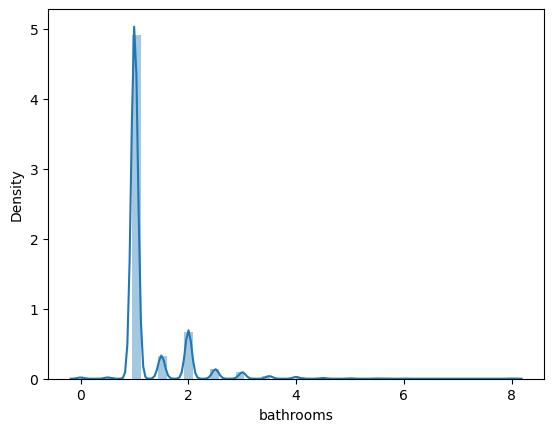

In [14]:
# Plotting bathrooms:

sns.distplot(airbnb_df["bathrooms"])

It seems to be skewed. Let's use the median to fill the null values.

In [15]:
# Bathrooms:

airbnb_df["bathrooms"] = airbnb_df['bathrooms'].fillna(round(airbnb_df["bathrooms"].median()))

Let's do the same for the others too.

<AxesSubplot: xlabel='review_scores_rating', ylabel='Density'>

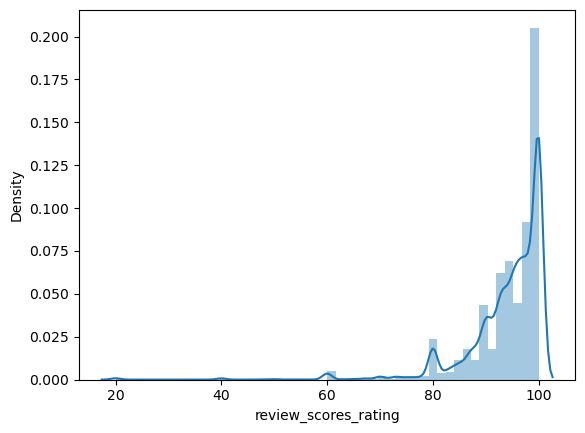

In [16]:
# Plotting review_scores_rating:

sns.distplot(airbnb_df["review_scores_rating"])

In [17]:
# Review_scores_rating:

airbnb_df["review_scores_rating"] = airbnb_df["review_scores_rating"].fillna(0)

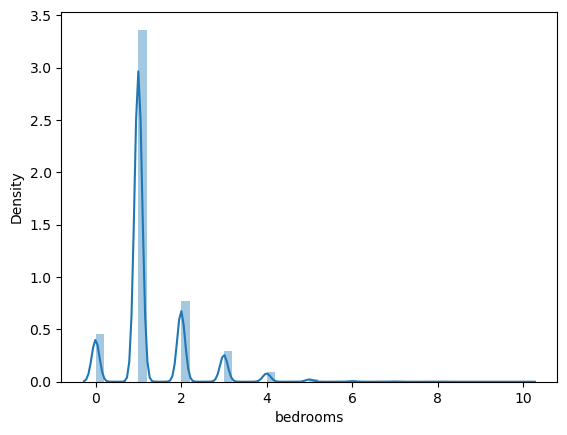

In [18]:
# Plotting bedrooms: 

sns.distplot(airbnb_df["bedrooms"])
plt.show()

In [19]:
# Bedrooms: 

airbnb_df["bedrooms"] = airbnb_df['bedrooms'].fillna((airbnb_df["bedrooms"].median()))

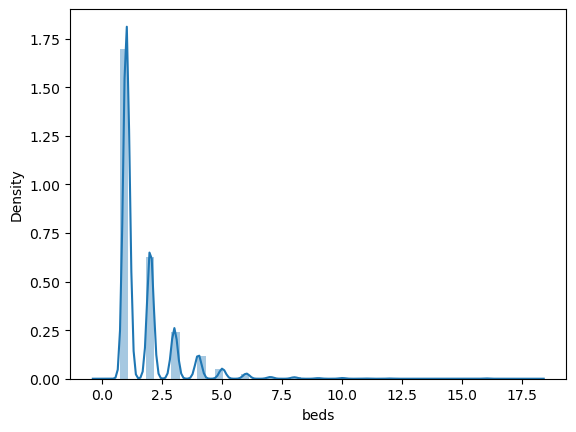

In [20]:
# Plotting beds: 

sns.distplot(airbnb_df["beds"])
plt.show()

In [21]:
# Beds:

airbnb_df["beds"] = airbnb_df["beds"].fillna((airbnb_df["beds"].median()))

Let's computes the count of amenities for each entry in the `amenities` and replaces the original "amenities" column with these counts. This transformation might be useful here where the count of amenities is more relevant than the specific amenities themselves.

In [22]:
# Converting amenities:

amenities_count = []
for i in airbnb_df["amenities"]:
    amenities_count.append(len(i))
    
airbnb_df["amenities"] = amenities_count

### EDA and Visualization

For easy plotting of categorical data, let's use **plot_catplot()** which can include bar plots, box plots, violin plots, etc and **plot_piechart()** specifically creates pie charts using matplotlib.

In [23]:
# Function to plot catplot graphs:

def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)
    
# Function to plot catplot piechart:

def plot_piechart(h):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    langs = list(airbnb_df[h].unique())
    students =list(airbnb_df[h].value_counts())
    ax.pie(students, labels = langs,autopct='%1.2f%%')
    plt.show()

Let's visualize each columns. Starting with the price distribution.

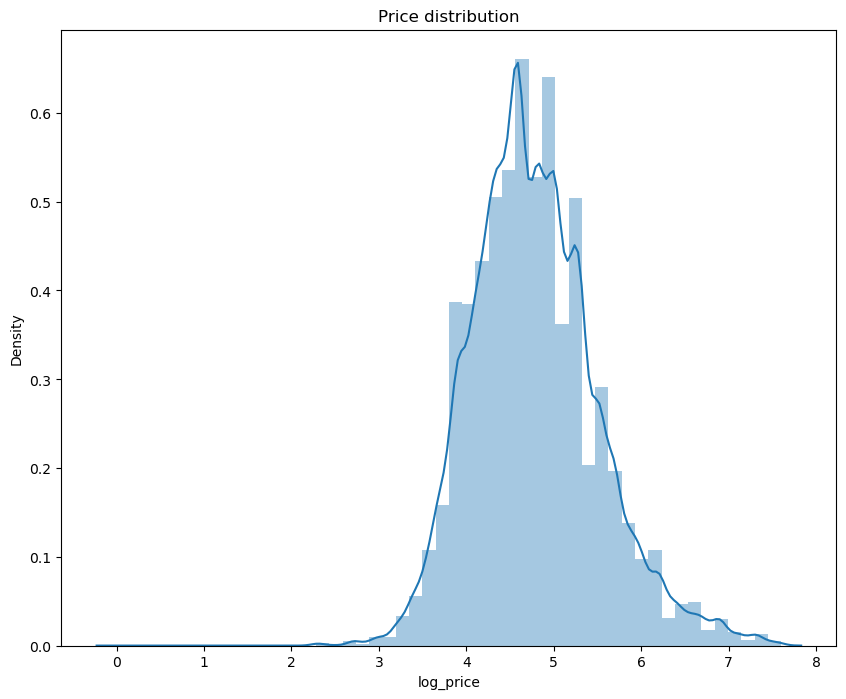

In [24]:
# Price distribution:

plt.figure(figsize = (10, 8))
sns.distplot(airbnb_df["log_price"])
plt.title('Price distribution')
plt.show()

The prominent peak at log_price 4 indicates that prices around this value are prevalent.
The distribution appears to be skewed, with fewer instances of extremely high or low prices.

**room_type**

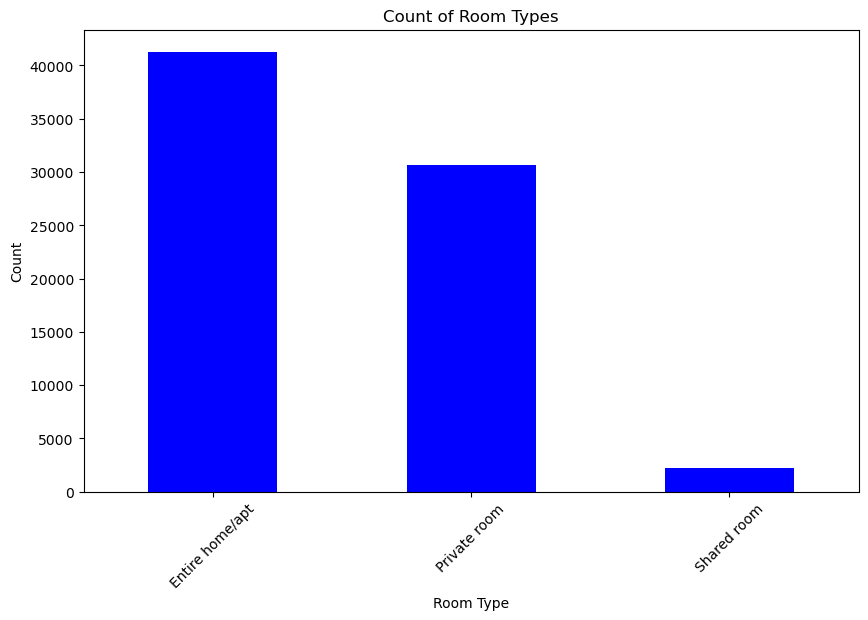

In [25]:
# Plotting room_type:

room_type_counts = airbnb_df['room_type'].value_counts()

plt.figure(figsize=(10, 6))  # Adjust size as needed
room_type_counts.plot(kind='bar', color='blue')
plt.title('Count of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

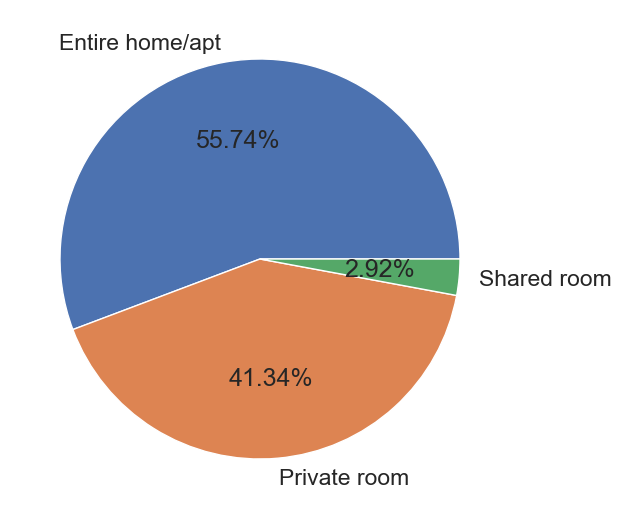

In [26]:
plot_piechart("room_type")

Most of the listing are the Entire home/apt, followed by Pricate room. There is only few listings for Shared room.

**city**

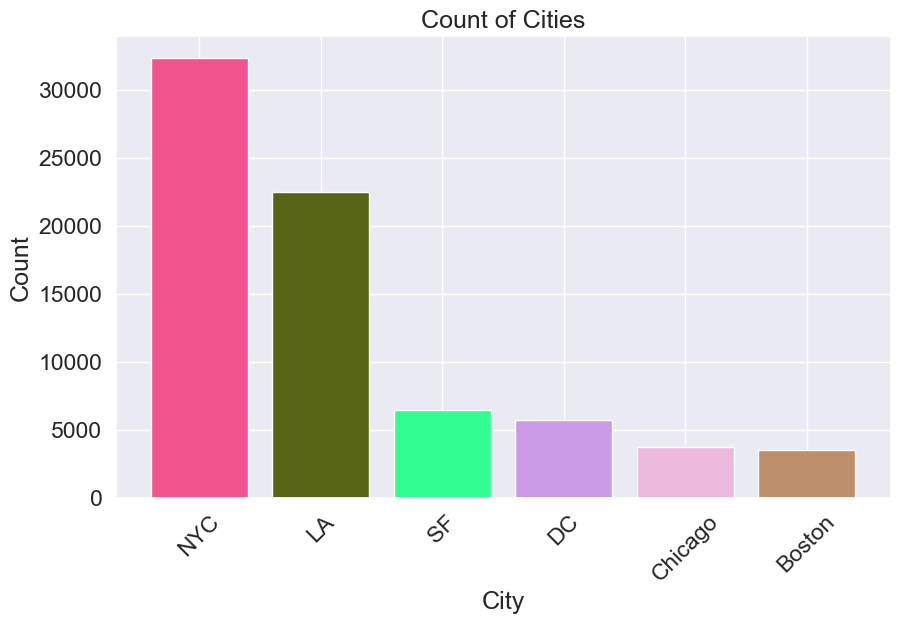

In [27]:
# Plotting city:

city_counts = airbnb_df['city'].value_counts().head(10)  # Assuming you want to plot the top 10 cities


colors = np.random.rand(len(city_counts), 3)  

plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.bar(city_counts.index, city_counts, color=colors)
plt.title('Count of Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

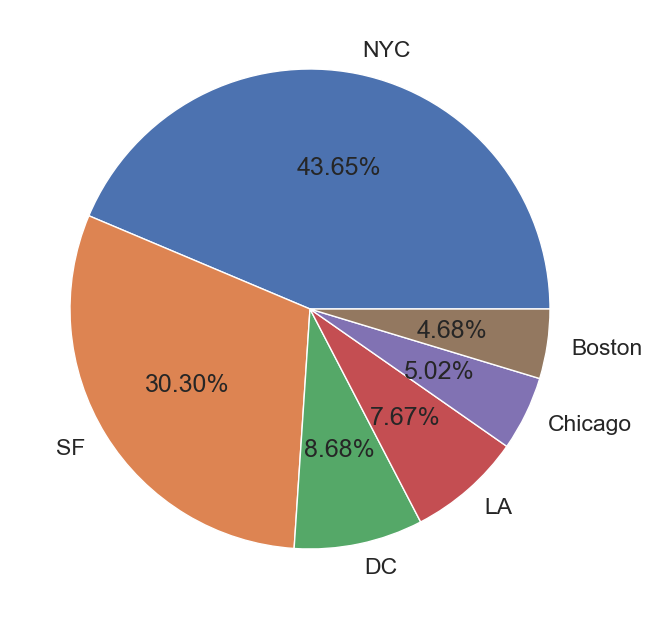

In [28]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(airbnb_df.city.unique())
students =list(airbnb_df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

The dataset contains mainly 5 cities which are NYC (New York City), Boston, Chicago, LA (Los Angels), DC (District of Columbia) and SF (San Fransisco). Most of the listings are from NYC and the least are from Boston. 

**neighbourhood**

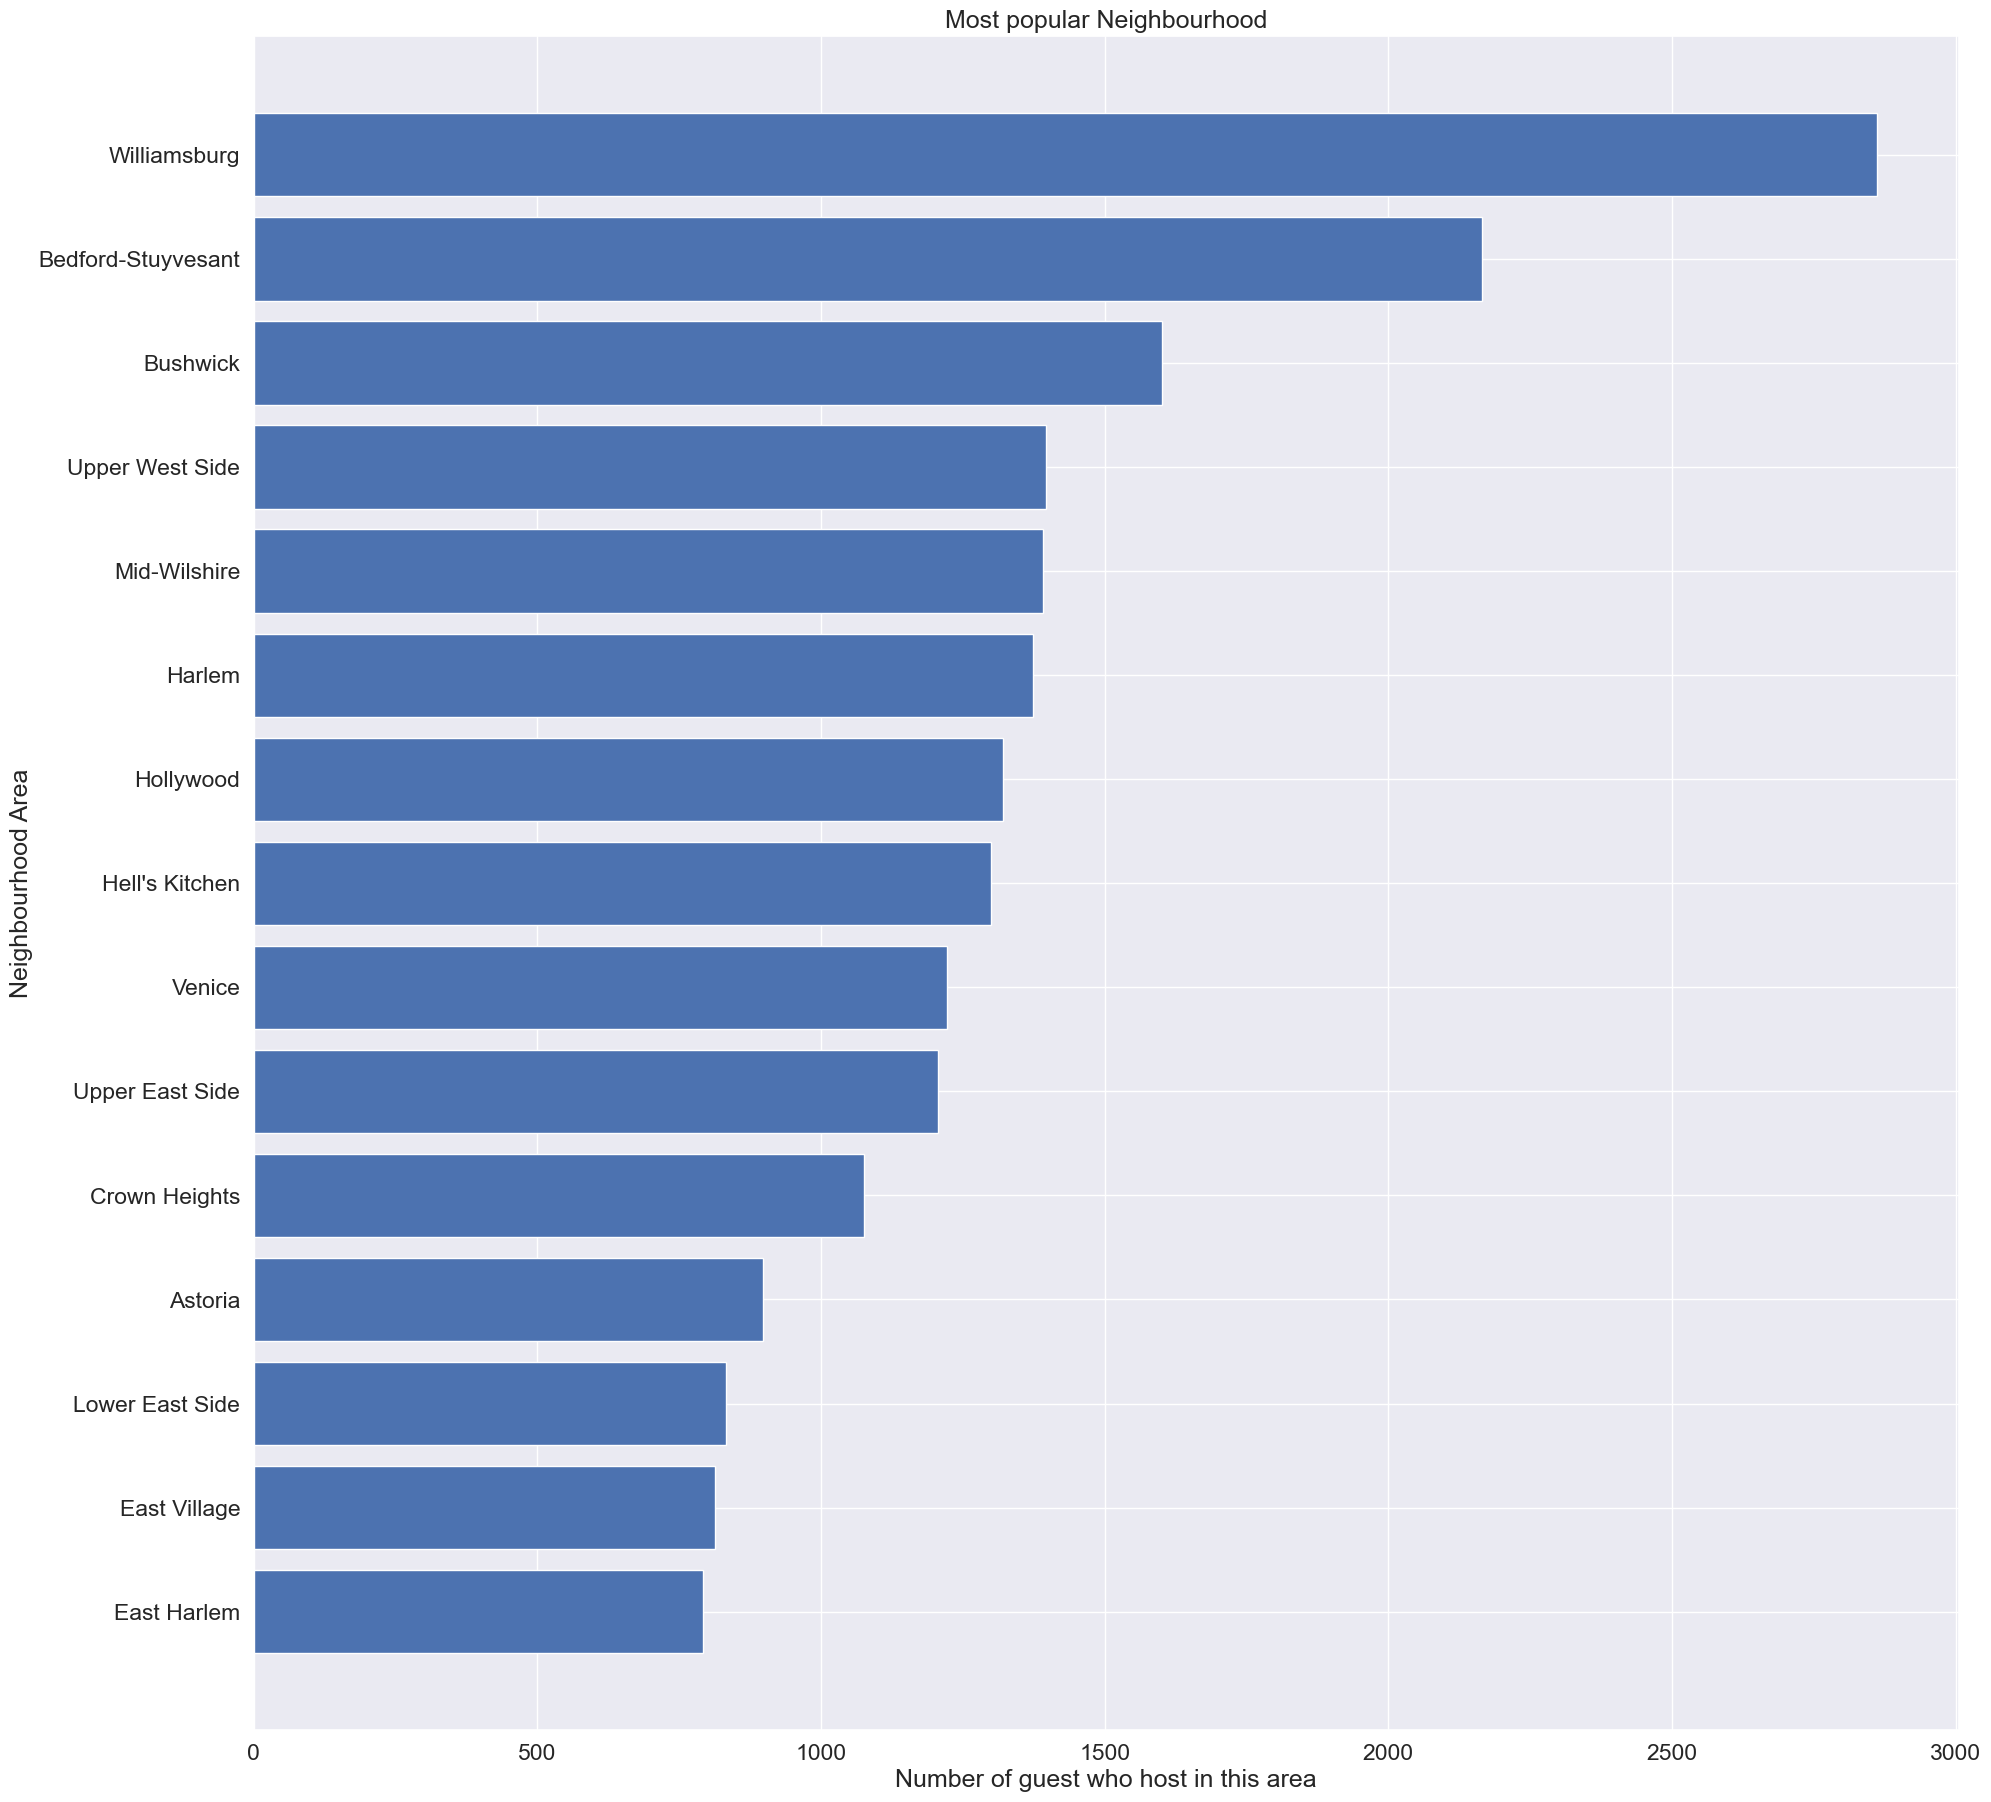

In [29]:
# Plotting neighbourhood:

data = airbnb_df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

Most of the guests are dwelling at **Williamsburg**. The least are at **East Harlem**.

**cancellation_policy**

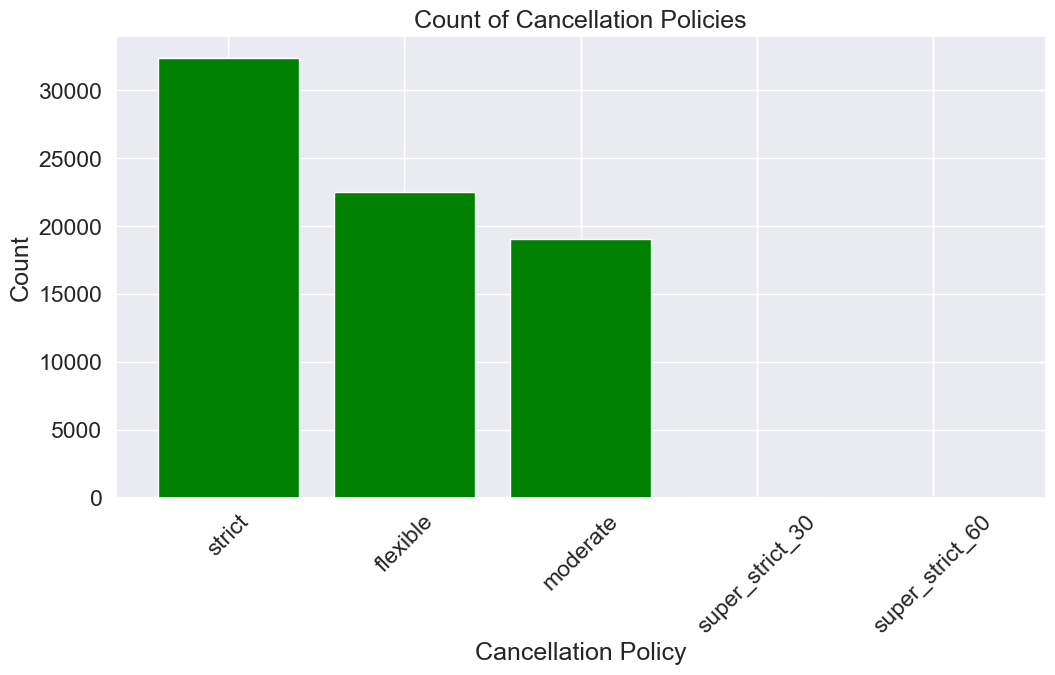

In [30]:
# Plotting cancellation_policy:

cancellation_policy_counts = airbnb_df['cancellation_policy'].value_counts()

plt.figure(figsize=(12, 6)) 
plt.bar(cancellation_policy_counts.index, cancellation_policy_counts, color='Green')
plt.title('Count of Cancellation Policies')
plt.xlabel('Cancellation Policy')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

Most of the hosts are strict in their cancellation_policy. No host are super strict.

**cleaning_fee**

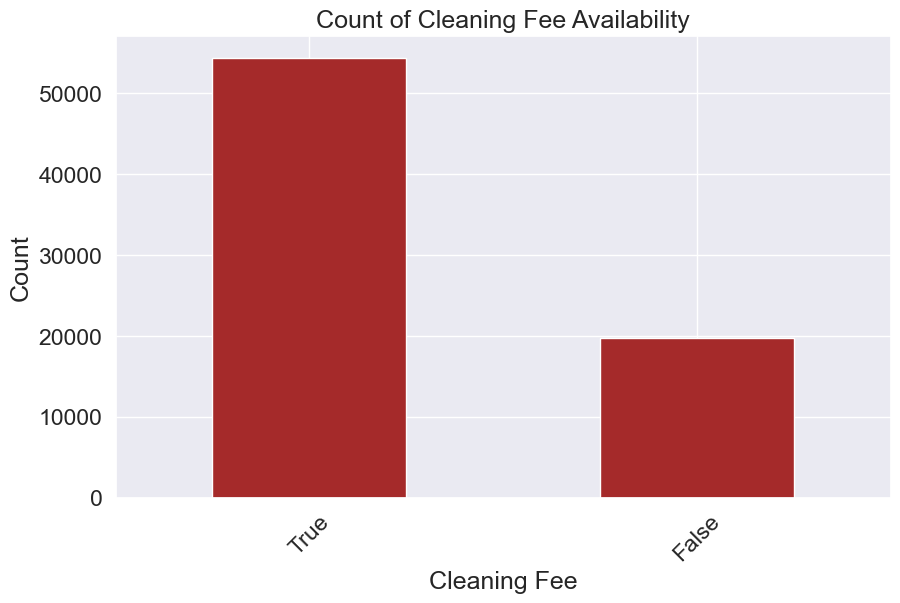

In [31]:
# Plotting cleaning_fee: 

cleaning_fee_counts = airbnb_df['cleaning_fee'].value_counts()

plt.figure(figsize=(10, 6))  
cleaning_fee_counts.plot(kind='bar', color='brown')
plt.title('Count of Cleaning Fee Availability')
plt.xlabel('Cleaning Fee')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

Most of the listings have cleaning fee included with the price. For those without including the cleaning fee might have to pay separately.

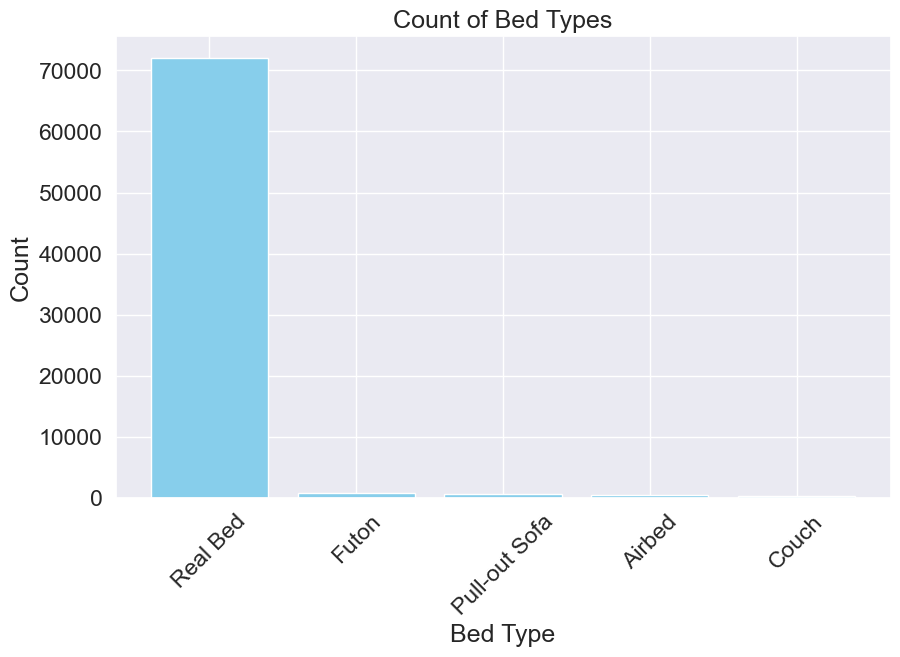

In [32]:
# Plotting bed_type:

bed_type_counts = airbnb_df['bed_type'].value_counts()

plt.figure(figsize=(10, 6)) 
plt.bar(bed_type_counts.index, bed_type_counts, color='skyblue')
plt.title('Count of Bed Types')
plt.xlabel('Bed Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

Most of the listing provide Real Bed. Only few of them provide Futon, Pull-out Sofa and Airbed.

Let's check for the **outliers**. An outlier is a data point that significantly differs from other observations in a dataset.

In [33]:
# For plotting boxplots which are useful for finding outliers:

def plot_boxplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.boxplot(data=airbnb_df, x=h, y=v)
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

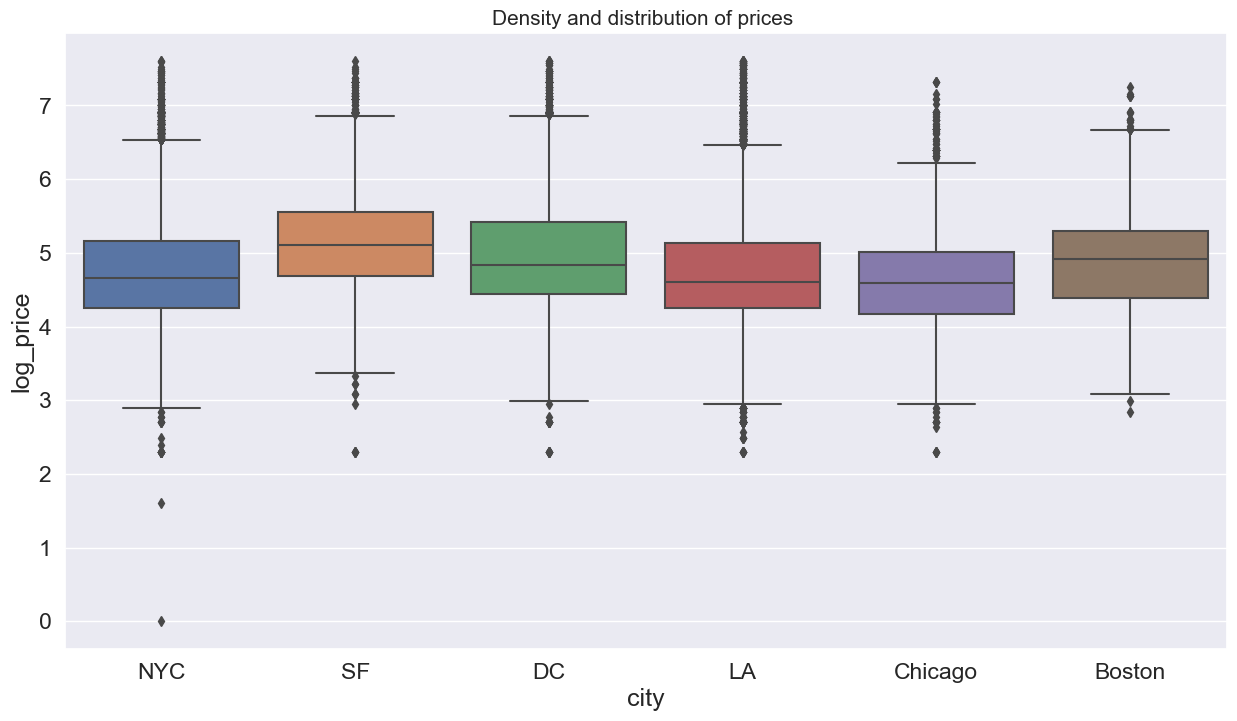

In [34]:
# City:

plot_boxplot("city","log_price")

The presence of many outliers suggests that there are substantial variations in pricing between different cities. Some cities may have higher average or median prices compared to others, leading to data points that lie far outside the range of prices observed in most cities.

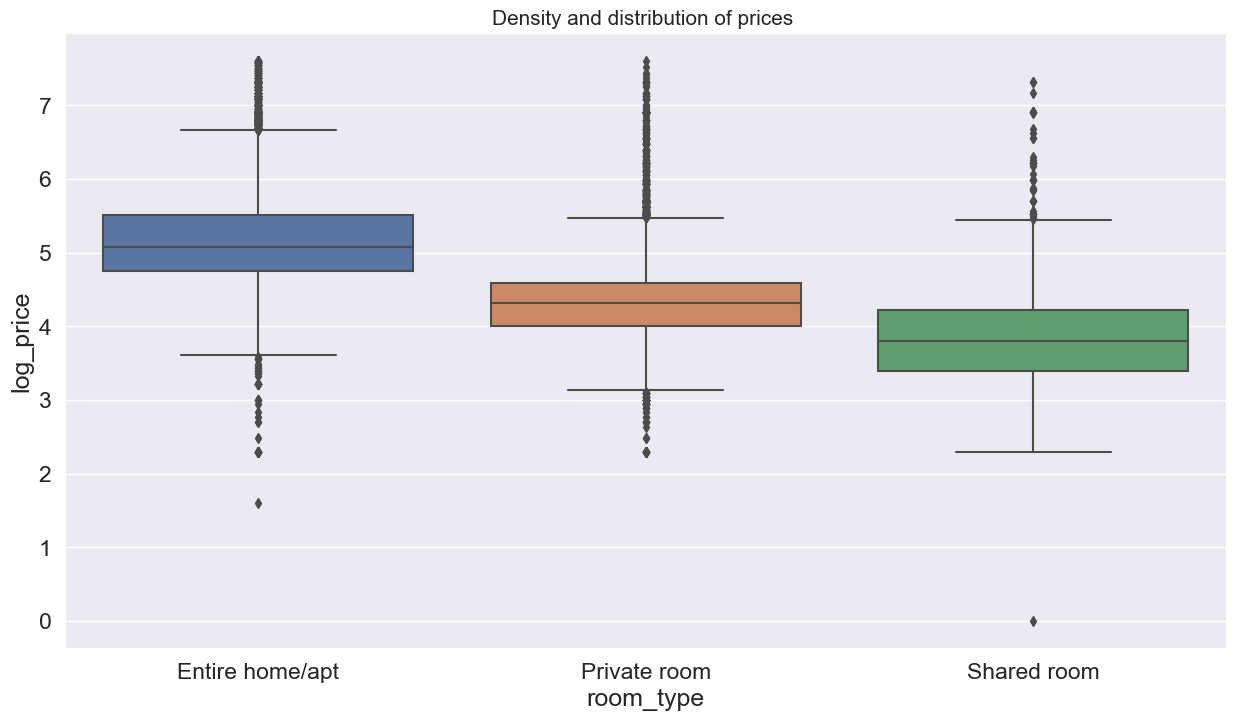

In [35]:
# Room_type:

plot_boxplot("room_type","log_price")

Here, the **Private room** is having more outliers than Entire home.

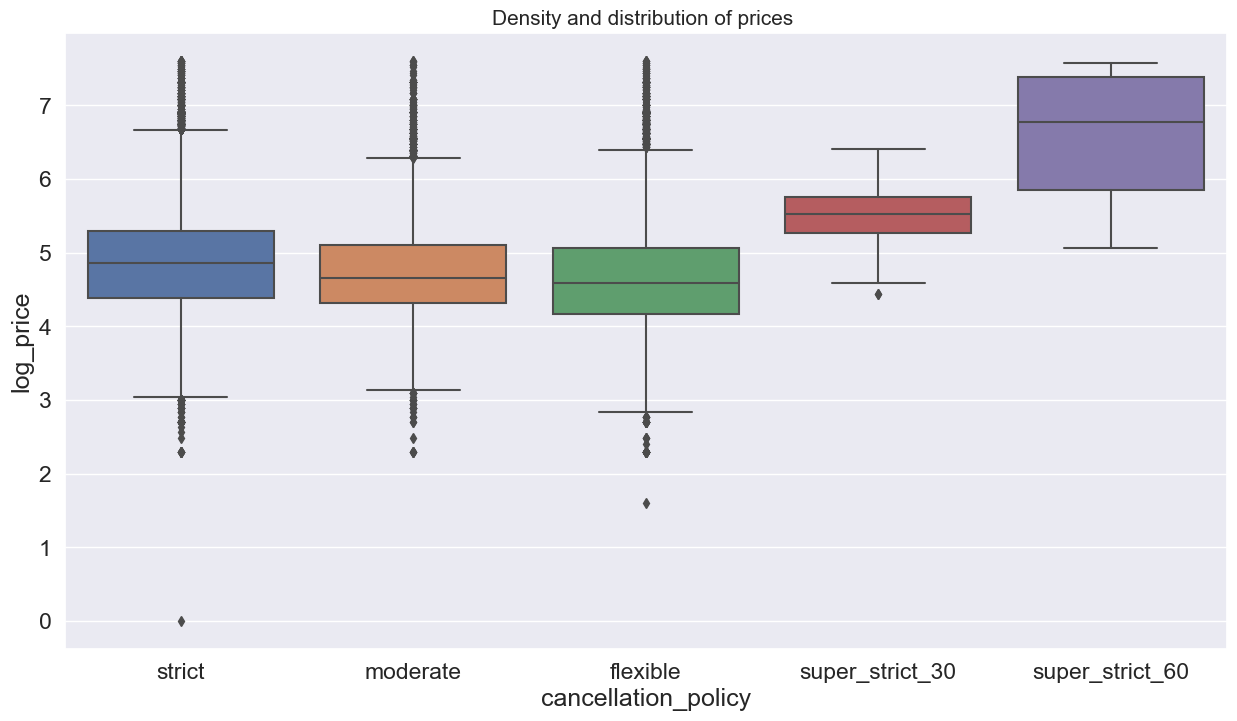

In [36]:
# Cancellation_policy:

plot_boxplot("cancellation_policy","log_price")

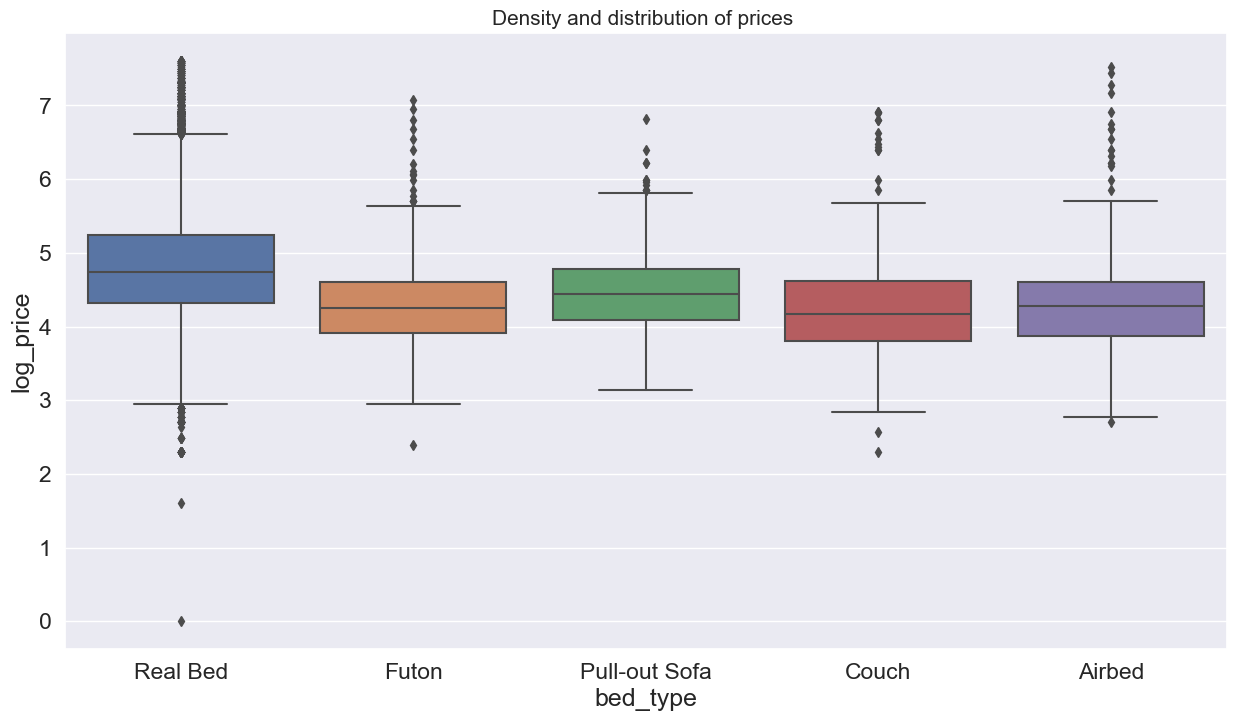

In [37]:
# Bed type:

plot_boxplot("bed_type","log_price")

Let's visualize the distribution of the target variable 'log_price' in a dataset using seaborn and matplotlib in Python. Additionally, we can generatea probability plot to check for the normality of the data.

In [38]:
# Importing libraries:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

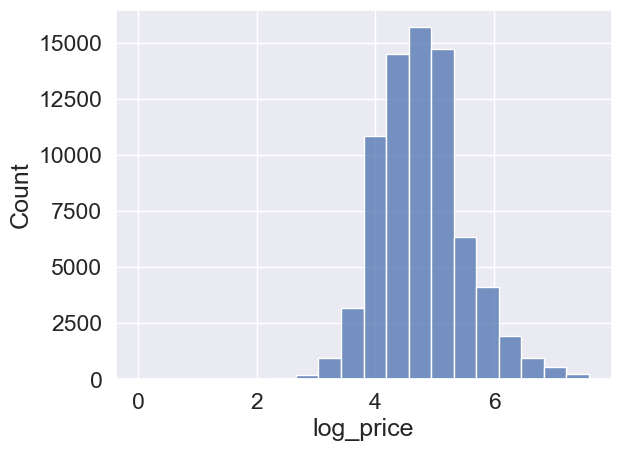

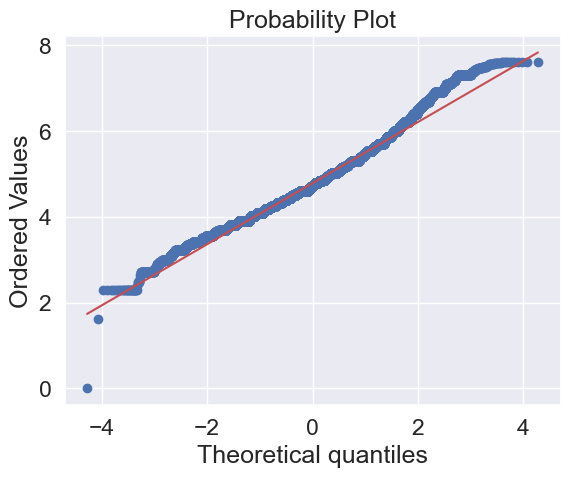

In [39]:
# Target Variable:

sns.histplot(data=airbnb_df, x='log_price', bins=20)
plt.show()
print('\n\n')

fig = plt.figure()
res = stats.probplot(airbnb_df['log_price'], plot=plt)
plt.show()

A red line overlays the plot, representing the expected distribution if the data were perfectly normal.

The blue dots closely follow the red line, indicating that the data is approximately **normally distributed.**

Now, let's separate the columns into categorical and numerical data.

In [40]:
# Separating the columns:

categorical_col = []
numerical_col = []
for column in airbnb_df.columns:
    
    if airbnb_df[column].dtypes != "float64" and airbnb_df[column].dtypes != "int64":
        categorical_col.append(column)
    else:
        numerical_col.append(column)

This code iterates through each column in tha dataframe and if the data type of the column is not float64 or int64, it is considered categorical and added to the categorical_col list. Otherwise, it's considered numerical and added to the numerical_col list.

In [41]:
# Sanity check:

categorical_col

['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

In [42]:
# Sanity check:

numerical_col

['id',
 'log_price',
 'amenities',
 'accommodates',
 'bathrooms',
 'latitude',
 'longitude',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds']

Encoding categorical variables is a common preprocessing step in machine learning workflows. Categorical variables are variables that contain categories or groups rather than numerical values. Many machine learning algorithms require numerical input, so categorical variables need to be transformed into a numerical format. It also preserves ordinal information, prevent misinterpretation, and improve model performance.

Here, we are using **LabelEncoder()** function to do this.

In [43]:
# Encoding categorical variables:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_col:
    airbnb_df[col] = le.fit_transform(airbnb_df[col])

In [44]:
# Displaying:

pd.set_option("display.max_columns",None)
airbnb_df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,0,0,152,3,1.0,4,2,1,4,9967,2079,1,1,80,1069,0,926,40.696524,-73.991617,10455,77,2,100.0,32398,106,1.0,1.0
1,6304928,5.129899,0,0,218,7,1.0,4,2,1,4,19014,2492,1,0,2,2980,1,1358,40.766115,-73.989040,65663,252,6,93.0,16220,20,3.0,3.0
2,7919400,4.976734,0,0,311,5,1.0,4,1,1,4,55637,2395,1,1,2,2743,1,1349,40.808110,-73.943756,66387,247,10,92.0,32852,27,1.0,3.0
3,13418779,6.620073,17,0,210,4,1.0,4,0,1,5,63084,2395,1,1,80,2188,0,1349,37.772004,-122.431619,9378,325,0,0.0,33692,651,2.0,2.0
4,3808709,4.744932,0,0,174,2,1.0,4,1,1,2,15909,1676,1,1,2,2139,1,1114,38.925627,-77.034596,32059,119,4,40.0,65883,211,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,0,1,2,1,1.0,4,0,0,4,72518,1994,1,1,80,1432,0,1142,40.709025,-73.939405,72339,605,0,0.0,25229,110,1.0,1.0
74107,13281809,5.043425,0,0,224,4,2.0,4,1,1,3,30736,2137,1,0,2,2568,0,1197,33.871549,-118.396053,59893,255,16,93.0,13695,426,2.0,4.0
74108,18688039,5.220356,0,0,402,5,1.0,4,1,1,4,4686,1547,1,1,2,988,1,1345,40.706749,-73.942377,43683,605,43,94.0,37484,110,2.0,2.0
74109,17045948,5.273000,0,0,189,2,1.0,4,2,1,4,21021,1547,1,0,2,3070,1,1345,40.738535,-74.000157,26441,592,0,0.0,51019,13,0.0,2.0


Another problem we need to be mindfull is **Multicollinearity**. It is a statistical phenomenon in which two or more predictor variables in a regression model are highly correlated with each other.This poses a problem because it can make it difficult for the model to estimate the individual effects of each predictor variable on the outcome variable accurately. 

The **Correlation Matrix** calculates the correlation coefficients between all pairs of predictor variables in your dataset. Each cell in the correlation matrix will contain the correlation coefficient between two variables, ranging from -1 to 1.Use a heatmap visualization library (such as seaborn in Python) to create a heatmap of the correlation matrix. With a **Heatmap** visualisation, higher correlation coefficients are typically represented by warmer colors (e.g., shades of red) while lower correlation coefficients are represented by cooler colors (e.g., shades of blue).

In [46]:
# Correlation metrics:

airbnb_df.corr()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
id,1.000000,-0.007178,0.002945,0.005796,-0.001295,-0.005759,-4.058092e-03,-0.003818,-0.003019,-0.003059,0.003324,0.005970,-1.098560e-03,-0.002139,-0.002582,0.005491,0.002029,0.002497,0.001412,-0.003021,-0.001379,-0.000194,0.000402,0.002945,-0.004314,0.008448,-0.000650,-0.007578,-0.008876
log_price,-0.007178,1.000000,0.048741,-0.607125,0.100078,0.567574,3.551743e-01,0.093780,0.131869,0.111191,0.030913,-0.027847,-6.023151e-02,-0.011971,0.023433,0.033320,-0.078514,-0.044271,-0.014285,-0.002193,-0.047529,-0.032571,0.035344,-0.032470,-0.070596,0.040068,0.043479,0.473028,0.441953
property_type,0.002945,0.048741,1.000000,0.078672,0.119804,0.174718,2.580946e-01,0.012808,0.023837,0.035556,-0.101186,0.030484,-9.384136e-03,-0.009300,0.014268,-0.121765,0.018112,0.022528,0.000270,-0.301968,-0.288627,0.024993,0.063791,0.041011,0.018497,0.002514,0.308357,0.222567,0.181064
room_type,0.005796,-0.607125,0.078672,1.000000,-0.090244,-0.458175,-1.162561e-01,-0.149218,-0.174317,-0.213340,0.058806,0.028670,4.590331e-02,0.004208,-0.068139,0.020287,0.080148,0.027729,0.004936,0.022201,0.030317,0.050015,-0.006390,-0.030333,-0.078905,-0.044985,-0.018189,-0.243132,-0.317588
amenities,-0.001295,0.100078,0.119804,-0.090244,1.000000,0.187515,1.211908e-01,0.023528,0.215255,0.224424,-0.097849,0.007872,5.934674e-02,0.007816,0.135393,-0.261648,0.017955,0.096327,0.214580,-0.036155,-0.061668,0.001034,-0.005030,0.187562,0.229475,0.010144,0.079970,0.128505,0.170967
accommodates,-0.005759,0.567574,0.174718,-0.458175,0.187515,1.000000,5.054898e-01,0.074654,0.207242,0.182306,-0.102428,-0.000581,1.508183e-03,-0.011242,0.055835,-0.085731,0.008141,0.053093,0.038453,-0.078309,-0.085160,-0.050896,0.024537,0.041964,0.050873,0.051990,0.090706,0.709214,0.810247
bathrooms,-0.004058,0.355174,0.258095,-0.116256,0.121191,0.505490,1.000000e+00,0.038768,0.087661,0.054134,-0.076428,-0.001442,-4.314291e-07,-0.011671,0.012678,-0.020585,0.006511,0.001912,-0.030101,-0.137673,-0.134777,-0.024766,0.032797,-0.041521,-0.025847,0.052927,0.131727,0.589783,0.525699
bed_type,-0.003818,0.093780,0.012808,-0.149218,0.023528,0.074654,3.876817e-02,1.000000,0.038706,0.032604,0.005397,0.000785,2.081476e-02,-0.001048,0.009307,-0.023404,0.013195,0.027594,0.031184,0.001551,0.002134,0.002115,0.009491,0.006444,0.012147,0.014437,-0.004801,0.054020,0.065498
cancellation_policy,-0.003019,0.131869,0.023837,-0.174317,0.215255,0.207242,8.766061e-02,0.038706,1.000000,0.336007,-0.016800,0.002176,-1.095826e-01,0.019471,0.156754,-0.208884,-0.133974,0.013137,0.103041,0.010935,0.001727,-0.019903,-0.000407,0.191475,0.264964,-0.002438,-0.023385,0.127302,0.176650
cleaning_fee,-0.003059,0.111191,0.035556,-0.213340,0.224424,0.182306,5.413425e-02,0.032604,0.336007,1.000000,-0.019377,0.003711,-2.154242e-02,0.017119,0.160825,-0.203030,-0.092147,0.010031,0.088898,-0.060913,-0.068505,-0.021456,0.024041,0.110204,0.253140,0.002444,0.045628,0.105491,0.132089


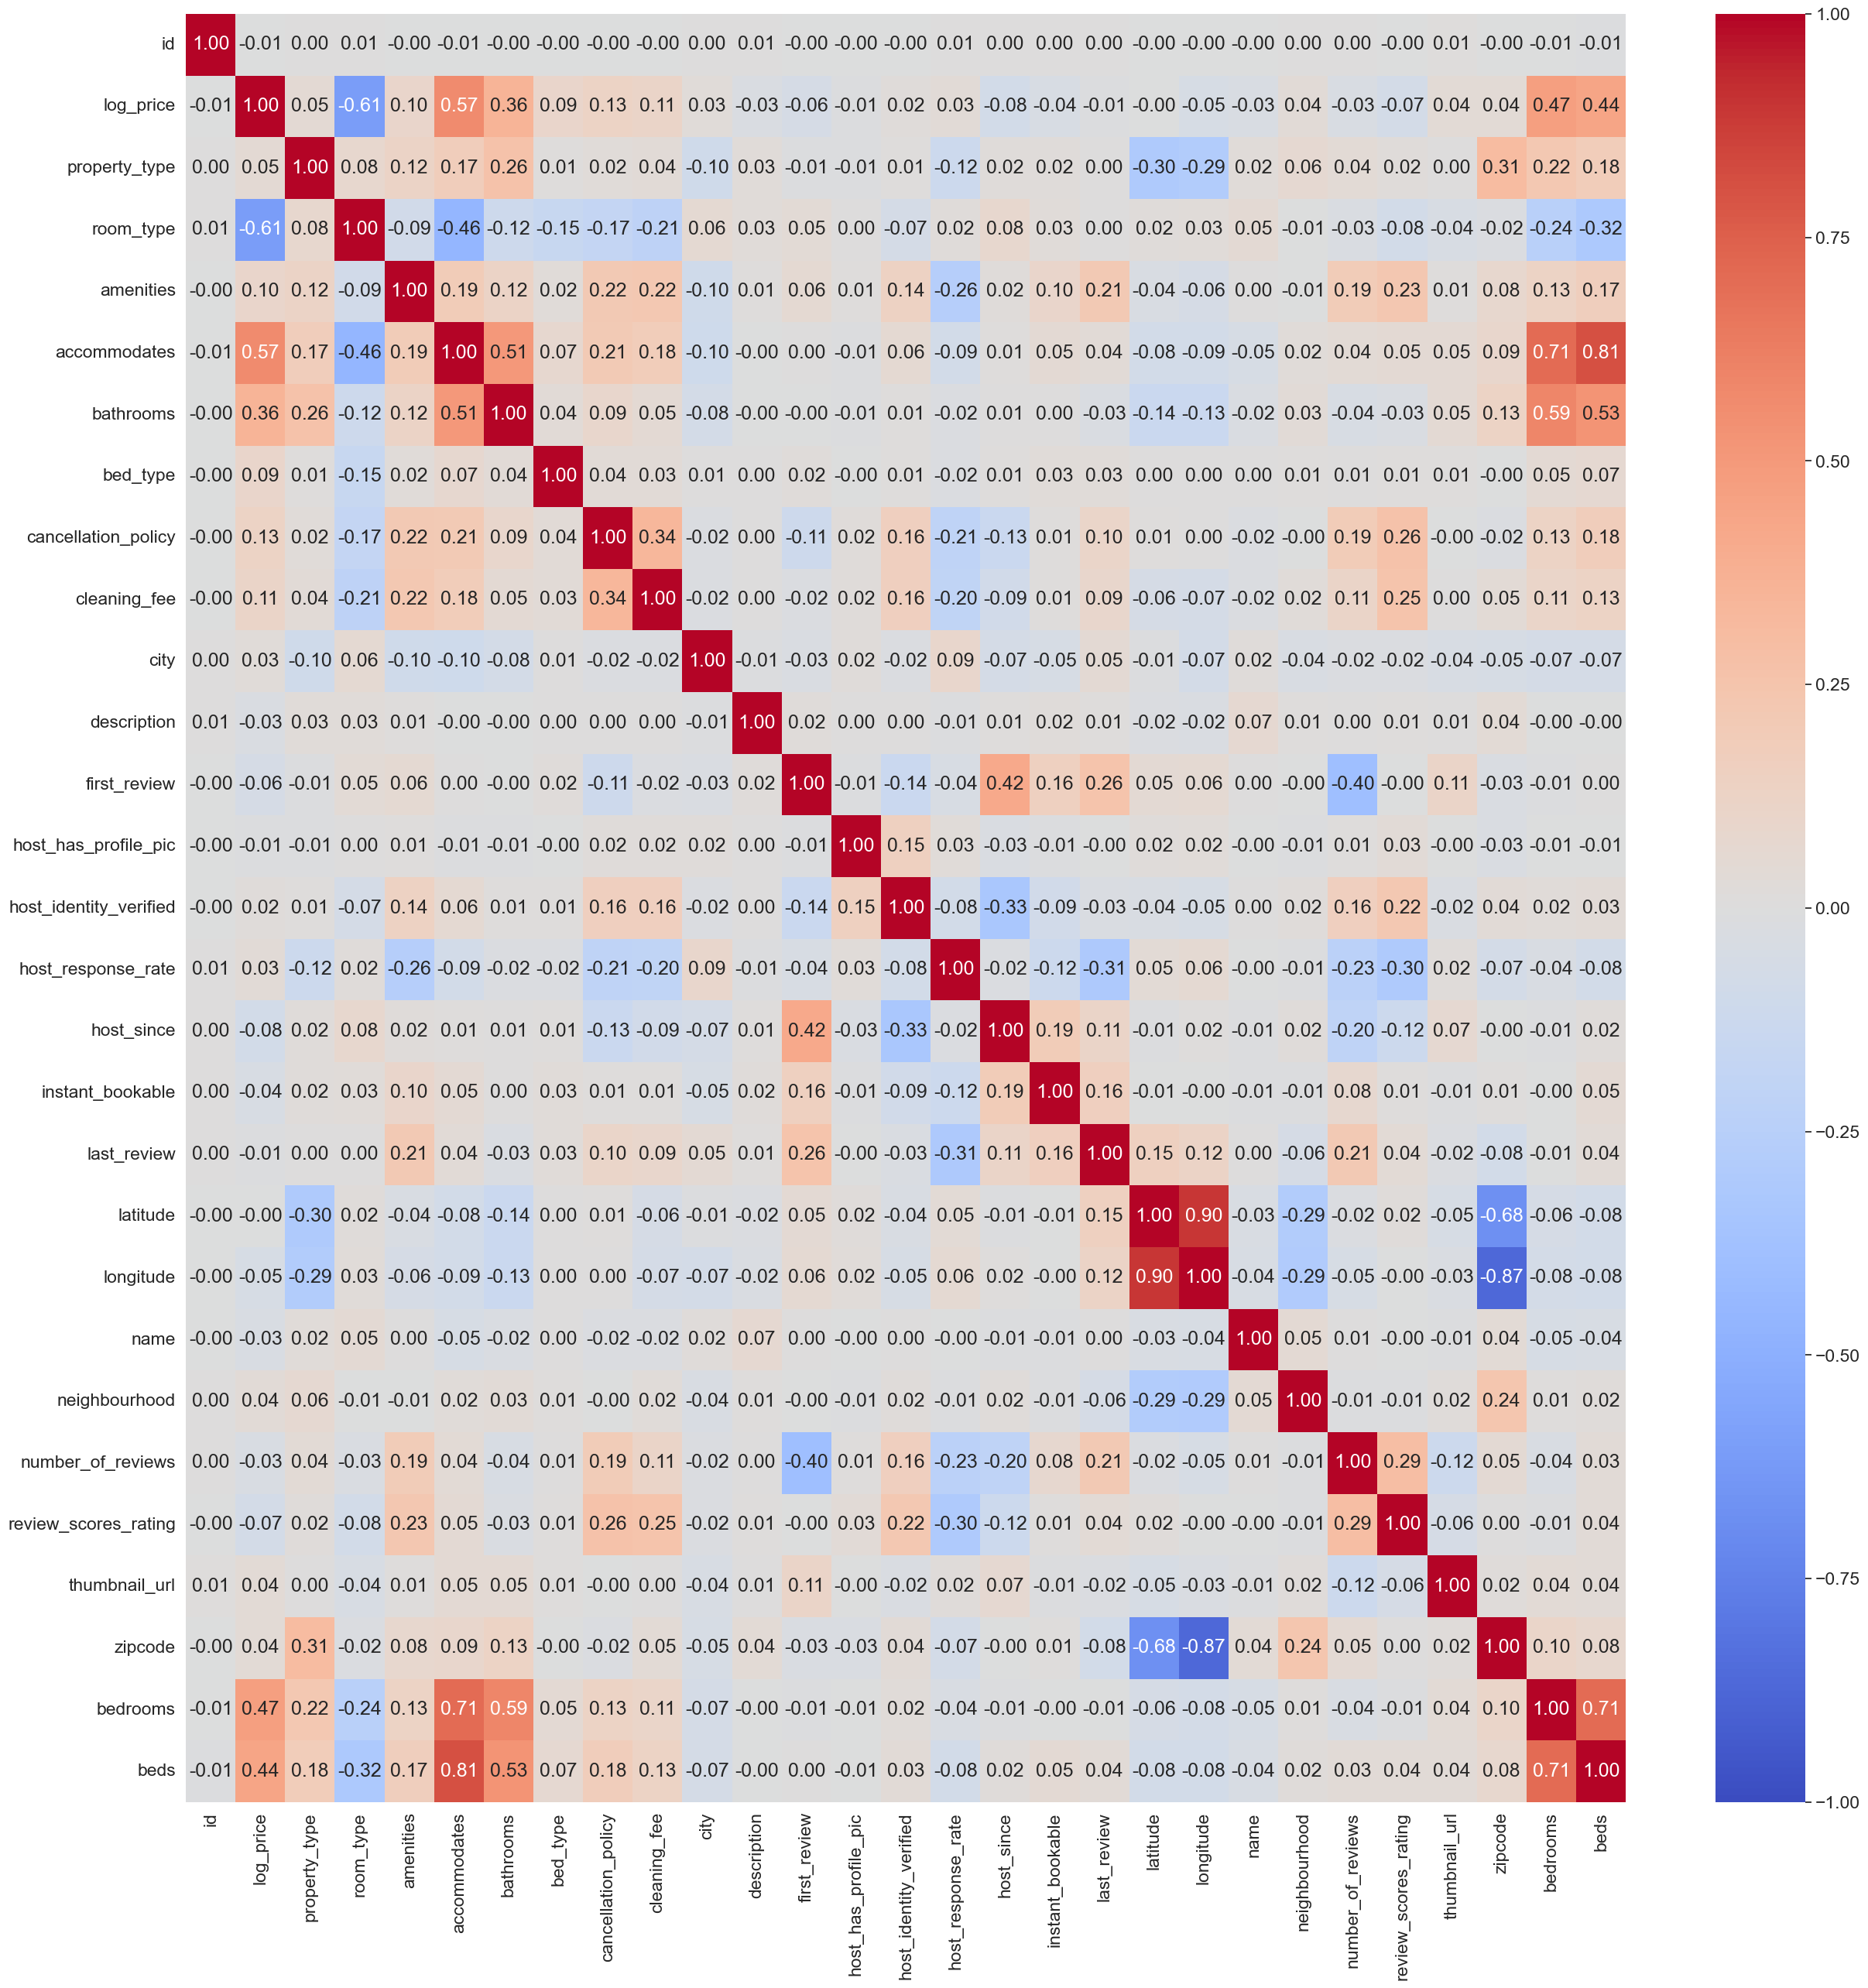

In [47]:
# Plotting heatmap:

plt.figure(figsize = (30,30))
sns.heatmap(airbnb_df.corr(), annot=True, vmax=1, vmin=-1, fmt=".2f", cmap="coolwarm")
plt.show()

The above heatmap shows there is no multicollinearity.

**Splitting X and y**

Let's prepare the data for modeling.

In [48]:
# Splitting the dataset:

X = airbnb_df.drop(["id","name","log_price","description","first_review","host_since","last_review","neighbourhood",
            "thumbnail_url", "zipcode"],axis = 1)
y = airbnb_df.log_price

This code creates **X** by dropping a list of columns specified in the code. These columns seems to be not be relevant for predicting the log price. **y** is the target variable that we want to predict.

In [49]:
# Sanity check:

X.shape

(74111, 19)

In [50]:
from sklearn.model_selection import train_test_split


# Splitting the X-train,y-train,X-test and y-test:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

Now, we have the preprocessed dataset ready for modelling.

### Models

In data science, a model refers to a simplified representation of a real-world process or system that is developed to make predictions, infer patterns, or gain insights from data. Models are fundamental because they allow us to understand and analyze complex phenomena, make predictions based on historical data, and uncover underlying relationships between variables.

There are various types of models used in data science, including statistical models (e.g., linear regression), machine learning models (e.g: decision trees, neural networks), and mathematical models (e.g: differential equations). The choice of model depends on the nature of the problem, the type of data available, and the goals of the analysis.

### Regression Models
Regression models are used to target a prediction value based on independent variables and it is mostly used for finding out the relationship between variables as well as preidction/forecasting.
Here, we will be using **Linear Regression** first and then **Random Forest Regression** models.

### Baseline model : Linear Regression

Linear regression is a widely used statistical technique for modeling the relationship between a dependent variable and one or more independent variables. It assumes that there is a linear relationship between the independent variables and the dependent variable.

The linear regression model can be represented by the equation:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +....+ \beta_n x_n + \epsilon $$

where:

- $y$ is the dependent variable (the variable we want to predict)
- $x_1, x_2, ...., x_n$ are the independent variables (features)
- $\beta_0, \beta_1, \beta_2,..., \beta_n$ are the coefficients of the model, representing the intercept and the slopes of the regression line for each independent variable.
- $\epsilon$  is the error term, representing the difference between the observed and predicted values of $y$.

The goal of linear regression is to estimate the coefficients $\beta_0, \beta_1, \beta_2,..., \beta_n$ that best fit the observed data points. 

In [66]:
# Importing libraries:

from sklearn.linear_model import LinearRegression as LR

# Create linear regression object:

lr = LinearRegression()

In [67]:
# Fit the model:

lr.fit(X_train,y_train)

LinearRegression()

In the context of a linear regression model, the **intercept** represents the value of the dependent variable when all independent variables are set to zero.

In [68]:
# Coefficients of linear regression line:

print('Intercept of Regression: ', lr.intercept_)
print()

Intercept of Regression:  2.4019420534276197



Here the **intercept value is 2.4**, it means that when all independent variables are set to zero, the predicted value of the dependent variable (the target variable) is 2.4

Let's print the **Coefficients of each features**. These are the weights assigned to each feature by the model. The coefficient represents the change in the target variable for a one-unit change in the feature, holding all other features constant.

In [69]:
# Print the Coefficients against Features:

print(pd.DataFrame(list(zip(X_train.columns, lr.coef_)), columns = ["Features", "Coefficients"]))
print()

                  Features  Coefficients
0            property_type      0.001079
1                room_type     -0.617403
2                amenities      0.000190
3             accommodates      0.085120
4                bathrooms      0.149370
5                 bed_type     -0.008263
6      cancellation_policy      0.016832
7             cleaning_fee     -0.040834
8                     city      0.054376
9     host_has_profile_pic     -0.029759
10  host_identity_verified     -0.001404
11      host_response_rate      0.000588
12        instant_bookable     -0.052223
13                latitude      0.042984
14               longitude     -0.004953
15       number_of_reviews     -0.000227
16    review_scores_rating     -0.001967
17                bedrooms      0.138399
18                    beds     -0.049365



A one-unit increase in the number of bathrooms (bathrooms) is associated with an increase in the predicted value of the target variable by approximately 0.149.
A one-unit increase in the number of bedrooms (bedrooms) is associated with an increase in the predicted value of the target variable by approximately 0.138.

**Note**: A positive coefficient indicates that as the predictor variable increases, the response variable also increases. A negative coefficient indicates that as the predictor variable increases, the response variable decreases.

Let's check for overfitting by comparing the R^2 value of the train set and the Out-of-Sample R^2 value of the test set.

In [70]:
# Check for overfitting:

lrm = LR()
results = cross_validate(lrm, X_train, y_train, cv=5, return_train_score = True)
print("R²: " + str(results["train_score"].mean()))
print("OSR²: " + str(results["test_score"].mean()))

R²: 0.5391874840088619
OSR²: 0.538553717144834


Both the values seems to be equal which indicates there is no overfitting.

In [55]:
# Predict response:

trainPredictionLR = lr.predict(X_train)
testPredictionLR = lr.predict(X_test)

Text(0.5, 1.0, 'Model Performance')

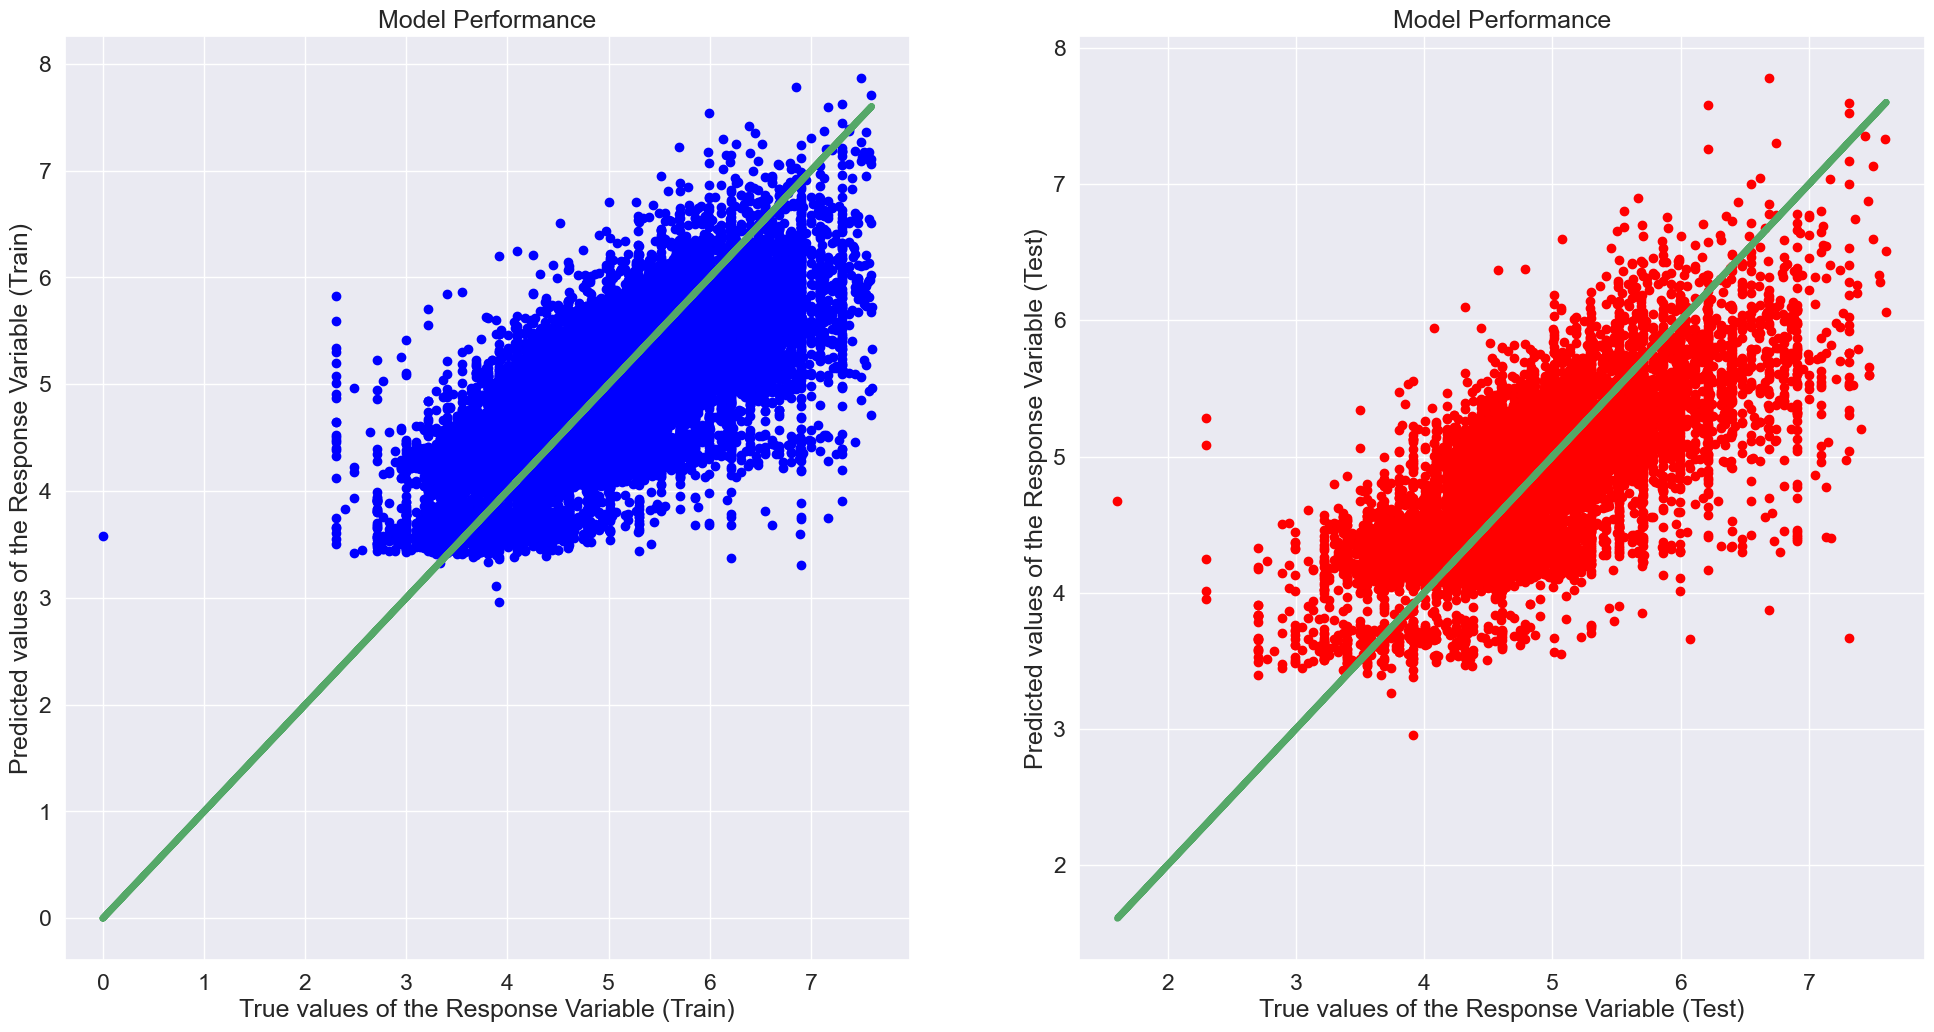

In [56]:
# Plot the Predictions vs the True values

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_title("Model Performance")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_title('Model Performance')

Points that lie on or near the diagonal line means that the values predicted by the Linear Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

To check the accuracy of your linear regression model, we calculate the **Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R-squared (R2) Score**. These metrics provide valuable insights into how well your model performs in predicting the target variable on unseen data.

- **Mean Absolute Error (MAE)**: Represents the average of the absolute differences between predicted and actual values. Lower values indicate better model performance.

- **Mean Squared Error (MSE)**: Represents the average of the squared differences between predicted and actual values. Lower values indicate better model performance.

- **Root Mean Squared Error (RMSE)**: Represents the square root of the MSE. It is in the same units as the target variable and provides a more interpretable measure of error.

- **R-squared (R2) Score**: Represents the proportion of variance in the dependent variable explained by the independent variables in the model. Higher values (closer to 1) indicate better model fit.

In [57]:
# Calculate the evaluation metrics:

mae_lr = metrics.mean_absolute_error(y_test, testPredictionLR)
mse_lr = metrics.mean_squared_error(y_test, testPredictionLR)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test,testPredictionLR))
r2_lr = metrics.r2_score(y_test, testPredictionLR)


print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
print('\nMean Squarred Error of Linear Regression     : ', mse_lr)
print('\nRoot Mean Squarred Error of Linear Regression: ', rmse_lr)
print('\nR2 Score of Linear Regression                : ', r2_lr)


Mean Absolute Error of Linear Regression     :  0.36870444243901135

Mean Squarred Error of Linear Regression     :  0.23465903966745005

Root Mean Squarred Error of Linear Regression:  0.4844161843574697

R2 Score of Linear Regression                :  0.5468814426430769


**To summarize these metrics with the prediction, the linear regression model has an average absolute error of approximately 0.3687 (indicates an average absolute difference of 0.3687 between the predicted prices and the actual prices), an average squared error of approximately 0.2347, a typical deviation of approximately 0.4844, and explains approximately 54.69% of the variance in Airbnb prices.**

In [75]:
# Accuracy: 

lrm.fit(X_train, y_train)
lrm_score = lrm.score(X_test, y_test)
lrm_score

0.5468814426430769

This model has an **accuracy score of 54%** which is good.

### Second model: Decision Tree

The linear regression model has very strong assumptions about the data, which usually don't always hold. Decision Trees, however, are non-parametric models with more flexibility to fit the data, although they are more prone to overfitting.

In order to reduce overfitting, I'm going to train a large decision tree (until we have 1 sample per leaf node) and then I'm going to prune the tree with the **Complexity Parameter cp**. This parameter will be chosen through **5-fold cross-validation**.

In [60]:
# Import the libraries:

from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_validate
from tqdm import tqdm

In [61]:
# Find the best value:

train_scores = []
val_scores = []
cps = []
for cp in tqdm([0,0.00005,0.0001,0.0005,0.001]):
    cps.append(cp)
    dtr = DTR(ccp_alpha=cp)
    results = cross_validate(dtr, X_train, y_train, cv=5, return_train_score = True)
    train_scores.append(results["train_score"].mean())
    val_scores.append(results["test_score"].mean())

100%|██████████| 5/5 [02:33<00:00, 30.64s/it]


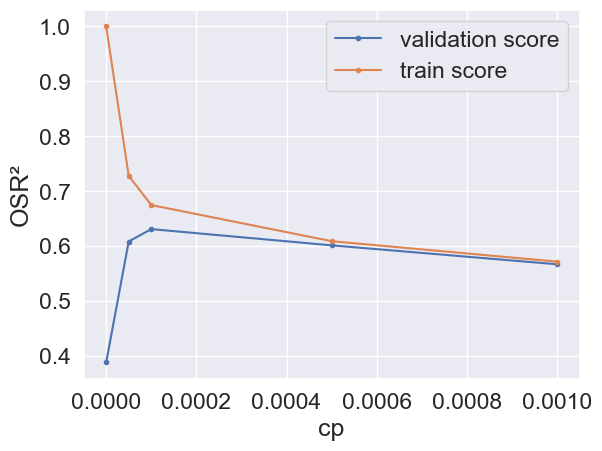

In [62]:
# Plotting:

ax=plt.plot(cps, val_scores, label="Validation Scores", marker='.')
ax=plt.plot(cps, train_scores, label="Train Score", marker='.')
ax=plt.legend(["validation score", "train score"])
ax=plt.xlabel("cp")
ax=plt.ylabel("OSR²")

From the plot above, we can see that cp=0.0001 gives the best OSR² score. Let's now train the Decision Tree algorithm with that cp value.

In [63]:
# Train the model:

dtr = DTR(ccp_alpha=0.0001)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0001)

In the context of Decision trees, **Importance** refers to the feature importance or variable importance. It quantifies the contribution of each feature to the predictive performance of the model.

Importance provides a score that indicates how useful or valuable each feature was in the construction of the decision trees within the model. The more a variable is used to make key decisions with decision trees, the higher its relative importance. Understanding feature importance is crucial for interpreting the model's behavior and identifying which features are most influential in making predictions.

In [71]:
# Importance:

ft_importance = pd.DataFrame({"feature": X_train.columns, "importance": dtr.feature_importances_}).sort_values("importance", ascending=False).query("importance > 0")
print(ft_importance.shape[0])
ft_importance.head(6)

15


,feature,importance
1,room_type,0.559238
4,bathrooms,0.172320
14,longitude,0.090387
13,latitude,0.071305
17,bedrooms,0.026789
3,accommodates,0.025619


The above table shows `room_type` has high value which indicates that this feature has a significant influence on the model's predictions.

Let's visualize a decision tree using the plot_tree function. This function typically generates a tree diagram that illustrates the structure of the decision tree model, including the nodes, splits, and leaf nodes.

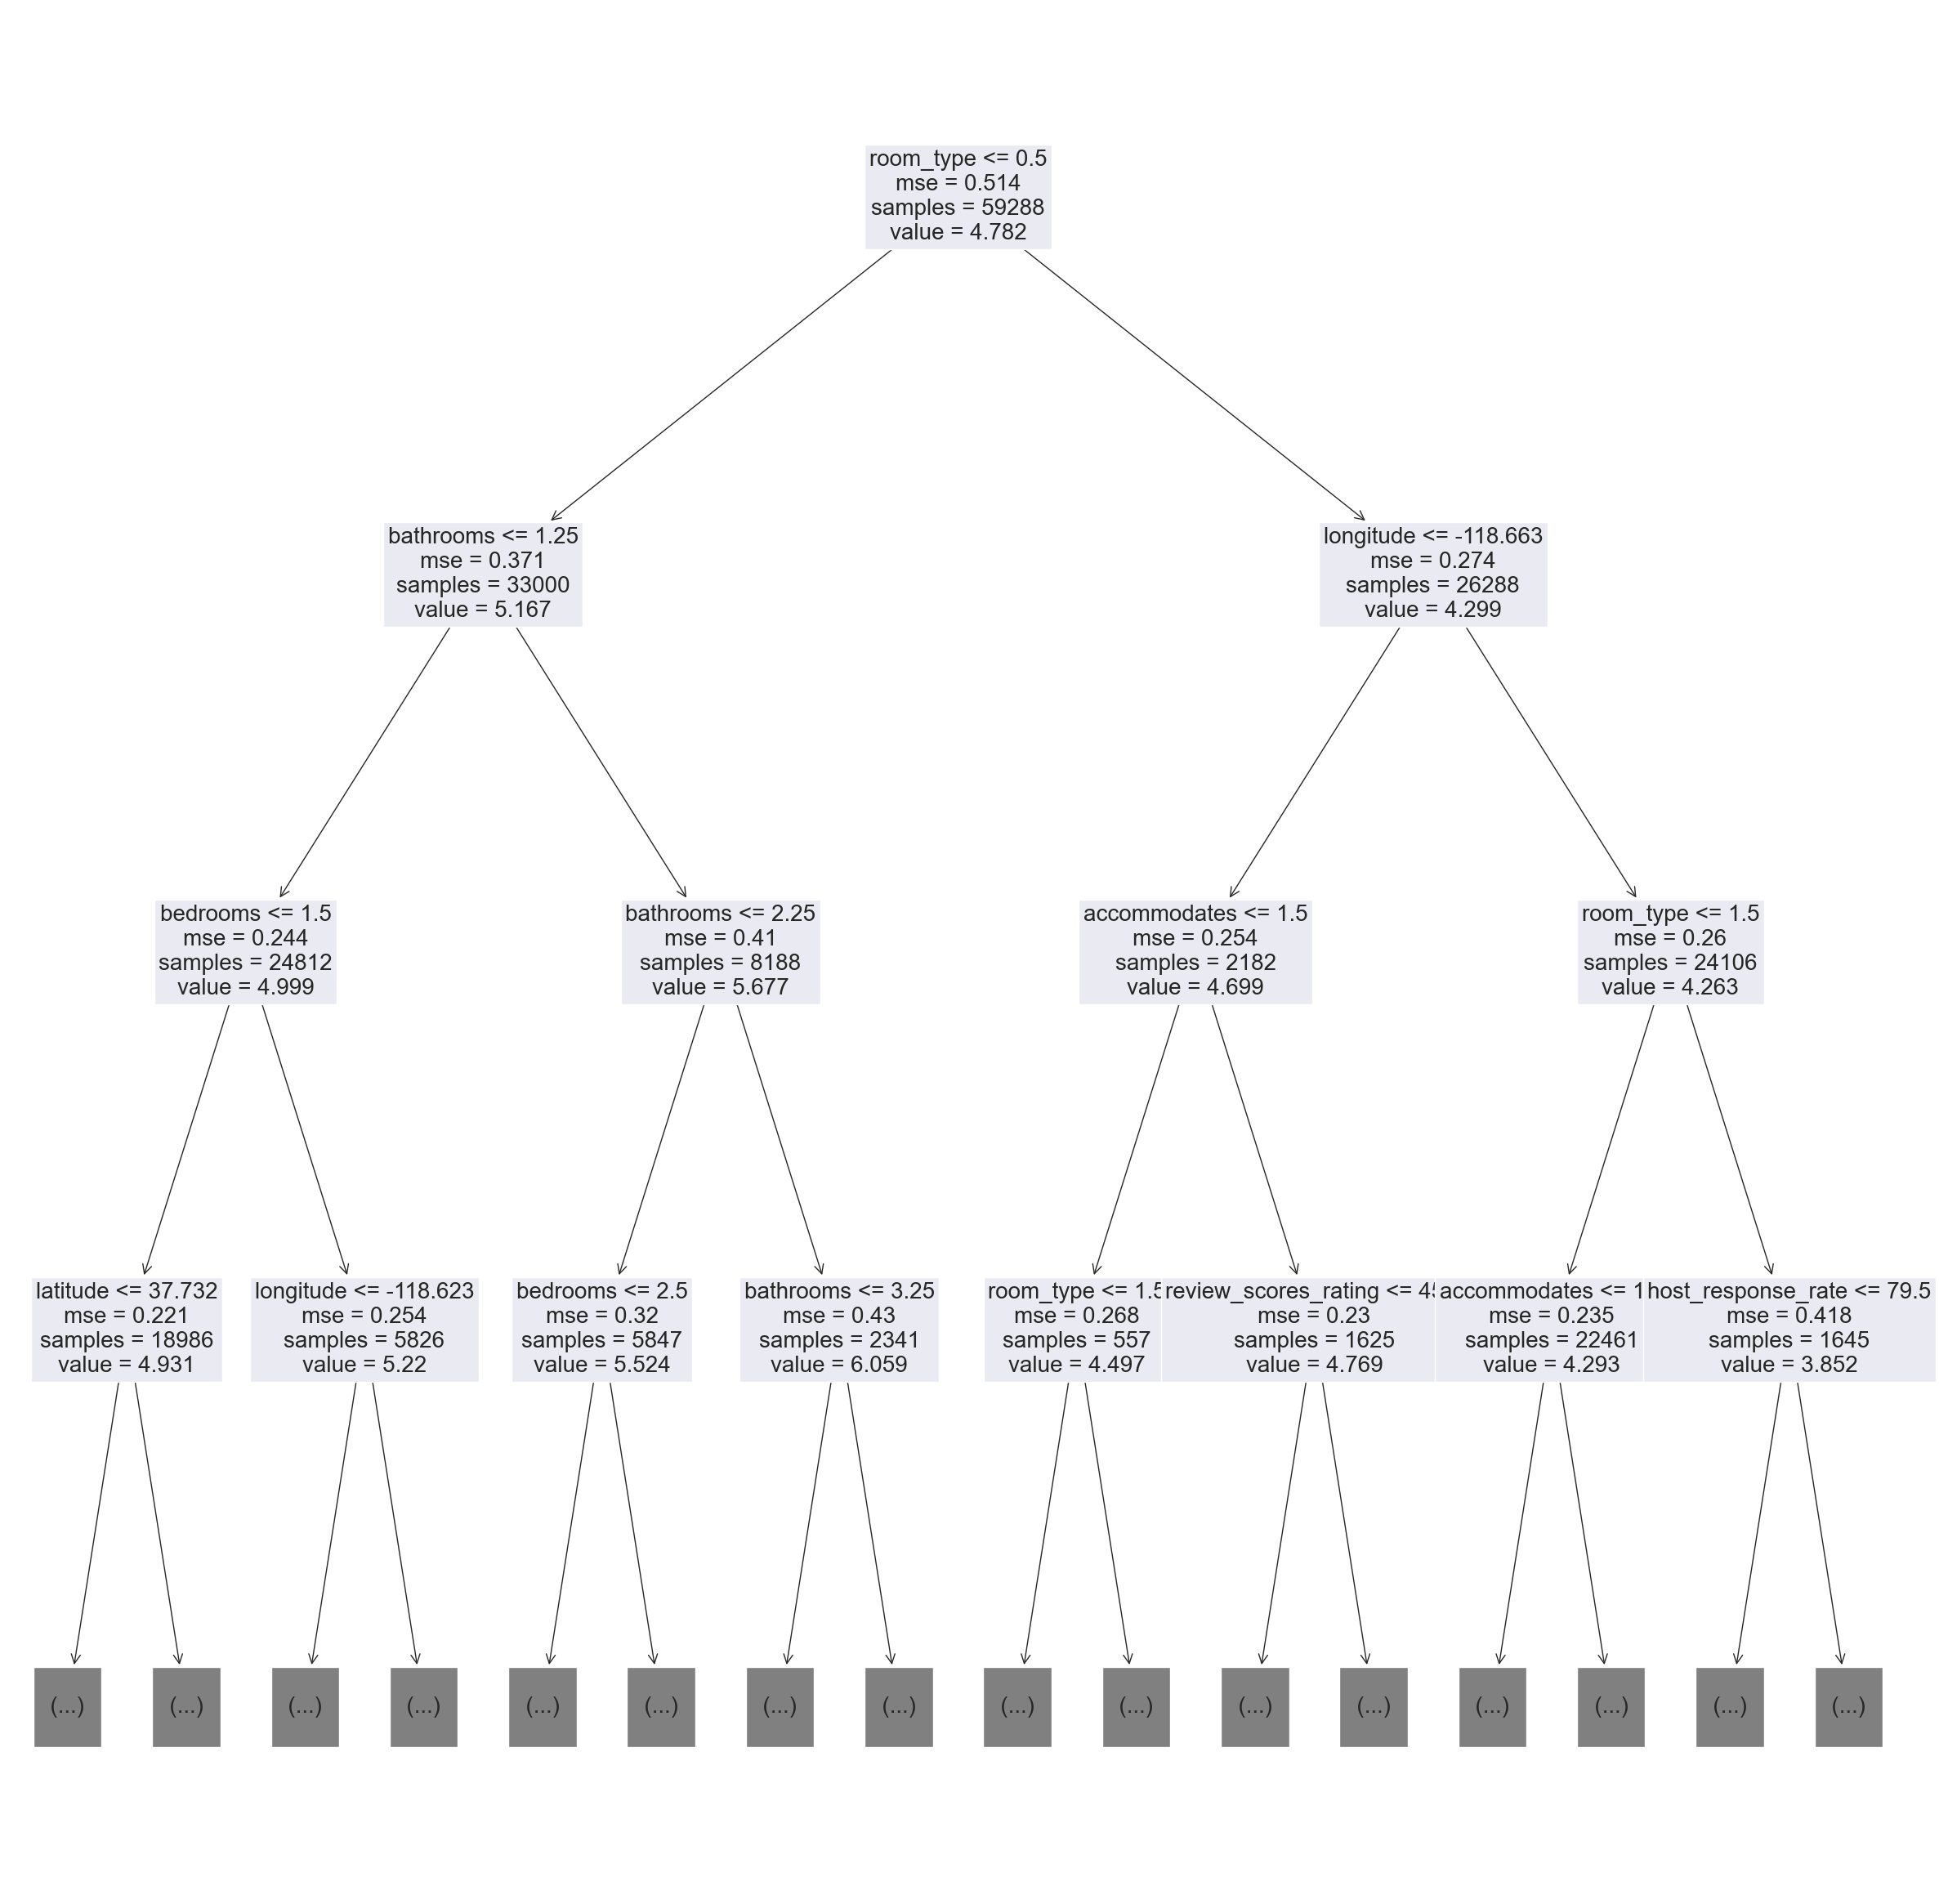

In [72]:
# Plot the Decision tree:

plt.figure(figsize=(30,30))
ax = plot_tree(dtr, feature_names = X_train.columns, fontsize=20, max_depth=3)

The `room_type` is the strongest predictor of the price, followed by the number of `bathrooms`, `location (longitude/latitude)` and number of `bedrooms`. This makes a lot of sense. Let's now see the final score on the test set:

In [73]:
# Accuracy:

dtr_score = dtr.score(X_test, y_test)
dtr_score

0.6432721921010698

This model has an **accuracy score of 64%** which is performing better that the linear regression model.

### Third model: Random Forest Regressor

Although the Decision Tree is more flexible than Linear Regression, it overfits the data more often. Even if we prune the tree, the greedy decisions we make in the beginning of the tree may not be the global optimum.

**Greedy Decision** refers to making choices that seem best at each step without considering their long-term implications or exploring alternative paths, often used in decision-making algorithms. One way to improve this is by using random forest regressor.

**Random Forest** is an ensemble technique that is able to perform both Regression and Classification tasks with the use of multiple decision trees and a technique that is called **Bootstrap Aggregation**. The idea behind this technique is to combine multiple decision trees in its prediction rather than relying on individual decision trees. By averaging the predictions of multiple trees, Random Forest Regressor tends to generalize well to unseen data and is less prone to overfitting compared to individual decision trees.

Here I am going to fix the number of trees at 150 and I will fine tune the percentage of features used at each split. One of the advantages of Random Forest is that, as we use bootstrapped datasets, we can estimate the error of each row using trees that weren't trained with that row. This is called **Out-of-Bag score**, and I'll be using that instead of cross-validation to evaluate the parameters.

Here, we use the RandomForestRegressor to help predict the price.

In [77]:
# Import the libraries:

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

In [78]:
# Finding the best parameter:

params = []
oob_scores = []
for i in tqdm(range(5)):
    max_ft = 0.4 + i/20
    params.append(max_ft)
    rfr = RFR(oob_score = True, max_features = max_ft)
    rfr.fit(X_train, y_train)
    oob_scores.append(rfr.oob_score_)

100%|██████████| 5/5 [01:05<00:00, 13.11s/it]


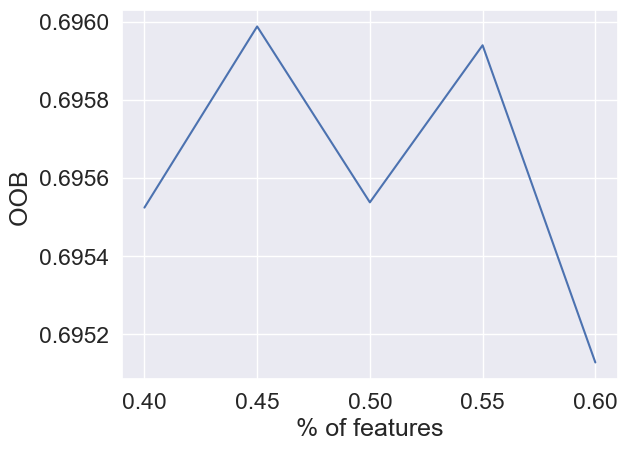

In [79]:
# Plotting:

ax=plt.plot(params, oob_scores)
ax=plt.xlabel("% of features")
ax=plt.ylabel("OOB ")

It seems that **45%** of the features shows the best OOB score. Let's check the feature importance too.

In [80]:
# Importance:

rfr = RFR(max_features = 0.5)
rfr.fit(X_train, y_train)
ft_importance = pd.DataFrame({"feature": X_train.columns, "importance": rfr.feature_importances_}).sort_values("importance", ascending=False).query("importance > 0")
print(ft_importance.shape[0])
ft_importance.head(6)

19


,feature,importance
1,room_type,0.272295
14,longitude,0.124240
17,bedrooms,0.113249
13,latitude,0.105828
3,accommodates,0.086018
4,bathrooms,0.066871


The top features here are almost the same as of decision tree, but we now have `bedrooms` after `longitude` which indicates the location and `accomodates` before `bathrooms`. Let's see the final score on the test set:

In [81]:
# Accuracy:

rfr_score = rfr.score(X_test, y_test)
rfr_score

0.7068652144369286

The model has an accuracy score of **70%** which is better than decision tree.

### Fourth model : Neural Network

Neural network is a continuous procedure of building the model and testing different parameters that produce the model with the highest accuracy.

There are 3 common standard models that we use to make predictions:
- **Multilayer Perceptrons (MLP)**
- **Convolutional Neural Networks (CNN)**
- **Recurrent Neural Networks (RNN)** 

Here, I’ve started off with MLP to acquire the underlying concepts in deep learning.

A **Multilayer Perceptron model**, or MLP for short, is a standard fully connected neural network model. It is comprised of layers of nodes where each node is connected to all outputs from the previous layer and the output of each node is connected to all inputs for nodes in the next layer.

I am going to scale the data using MinMaxScaler. **MinMaxScaler** is a data preprocessing technique commonly used in machine learning to scale numerical features to a specified range, typically between 0 and 1. It's a type of normalization technique that preserves the shape of the original distribution while scaling the values to a uniform range.

In [83]:
# Scaling:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

mn = MinMaxScaler()

X_train_scaled = pd.DataFrame(mn.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(mn.fit_transform(X_test), columns = X_test.columns)

y_train_scaled = pd.DataFrame(mn.fit_transform(y_train.to_numpy().reshape(-1,1)), columns = ['price'], index = X_train_scaled.index)
y_test_scaled = pd.DataFrame(mn.fit_transform(y_test.to_numpy().reshape(-1,1)), columns = ['price'], index = X_test_scaled.index)

Because of its complexity, several steps need to be followed:

    (1) Define the model
    (2) Compile the model
    (3) Fit the model
    (4) Evaluate the model
    (5) Make a prediction
    
To define the model, I use **Sequential Model** which is the simplest model to implement where it provides a sequential path with layers after layers in a linear manner.    

In [84]:
# Importing the libraries:

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

464/464 [==============================] - 0s 572us/step - loss: 0.2069 - mae: 0.3460


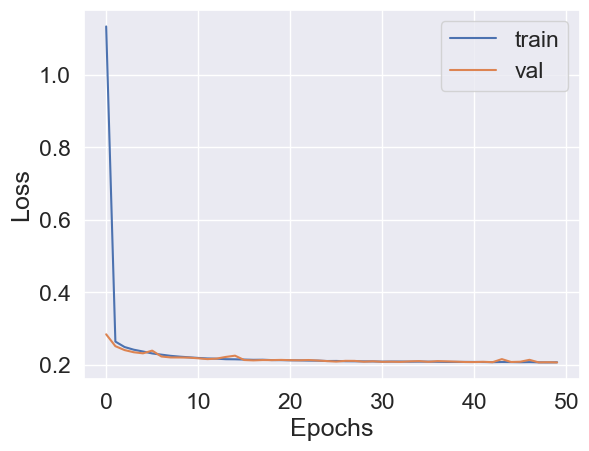

In [96]:
# Neural networks with no feature selection:


#Step1. Define the model

model = Sequential()

model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (X_train_scaled.shape[1],)))
model.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(1))


#Step2. Compile the model
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')



#Step3. Fit the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model

loss, mae = model.evaluate(X_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="val")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.show()

As seen, we achieved the **MAE of 0.3497** with the setting of the above model. Let’s set this number as the benchmark and see if we can get a smaller MAE as we optimize the model.

In [86]:
from sklearn.metrics import r2_score

# Assuming y_test contains true target values and X_test_scaled contains the scaled test features
# Predictions from the model
y_pred = model.predict(X_test_scaled)

# Calculate R-squared (R^2) score
r2 = r2_score(y_test, y_pred)
print("Model 1 R-squared (R^2) Score:", r2)


R-squared (R^2) Score: 0.5993860328517471


The accuracy of this model is **59%**.

The optimization methods that I will be using here are as follows:
- Neural Networks with different optimizers
- Neural Networks with Regularization (DropOut and L1/L2)

**Principal Component Analysis (PCA)** is a powerful technique for reducing the dimensionality of data, simplifying its complexity, and extracting meaningful insights. I am implementing PCA here.

In [87]:
# PCA:

from sklearn.decomposition import PCA

pca = PCA(0.90)
pca.fit(X_train_scaled)

X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

#### (a): Neural Networks with different optimizer

Let's start with different optimizer. Usually "adam" optimizer is used but I am going to use **RMSprop**. 

While both Adam and RMSprop are effective optimization algorithms, they have slightly different approaches to adapting learning rates and updating parameters during training. Adam incorporates momentum and bias correction, while RMSprop focuses solely on adapting the learning rates based on the squared gradients. The choice between the two often depends on the specific characteristics of the optimization problem and empirical performance on validation data.

464/464 [==============================] - 0s 514us/step - loss: 0.2296 - mae: 0.3650


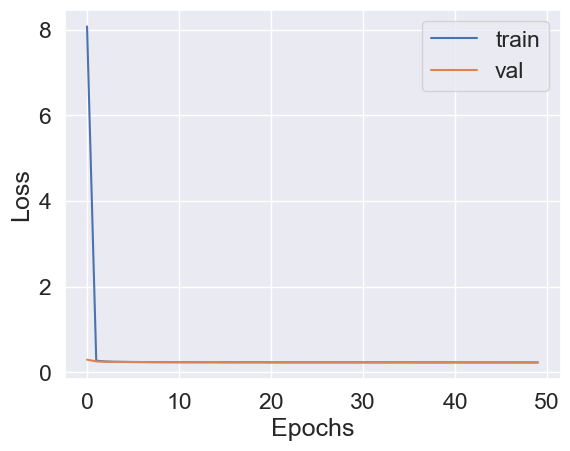

In [97]:
# Model 1: Using RMSprop optimizer

from tensorflow.keras.optimizers import RMSprop

#Step1. Define the model1

model1 = Sequential()

model1.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (X_train_scaled_pca.shape[1],)))
model1.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model1.add(Dense(1))


#Step2. Compile the model1
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
optimizer = RMSprop(learning_rate=0.001)  # You can adjust the learning rate as needed
model1.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

#Step3. Fit the model1
history = model1.fit(X_train_scaled_pca, y_train, validation_data=(X_test_scaled_pca, y_test), epochs=50, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model1

loss, mae = model1.evaluate(X_test_scaled_pca, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Here the MAE score is **0.3650** which is greater than our benchmark. Let's calculate the R^2 score.

In [112]:
from sklearn.metrics import r2_score

# Step 1: Generate predictions using the trained model
y_pred = model1.predict(X_test_scaled_pca)

# Step 2: Calculate R-squared (R^2) score
mod1r2 = r2_score(y_test, y_pred)
print("Model 1 R-squared (R^2) Score:", mod1r2)


Model 1 R-squared (R^2) Score: 0.5567163638568937


This model has an accuracy score of **55%**

#### (b): Add more layers

I would like to see if increasing model complexity by adding several additional layers would help decrease the MAE value or not.

464/464 [==============================] - 0s 541us/step - loss: 0.2260 - mae: 0.3623


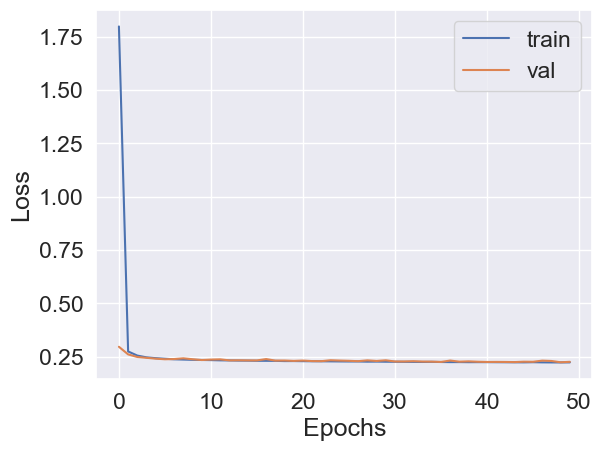

In [100]:
# Model 2: Adding more layers

#Step1. Define the model2

model2 = Sequential()

model2.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (X_train_scaled_pca.shape[1],)))
model2.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model2.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model2.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model2.add(Dense(1))


#Step2. Compile the model2
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model2.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

#Step3. Fit the model2
history = model2.fit(X_train_scaled_pca, y_train, validation_data=(X_test_scaled_pca, y_test), epochs=50, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model2

loss, mae = model2.evaluate(X_test_scaled_pca, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

If the 1st model has only 2 hidden layers with 16 and 8 nodes respectively, I added 2 additional layers on top of the existing and also increased the number of nodes. The model has slightly improved compared to the first, but still not significant enough compared to the benchmark.

By adding extra layers didnot make much changes in the MAE score **0.3623**.

In [113]:
# Step 1: Generate predictions using the trained model
y_pred = model2.predict(X_test_scaled_pca)

# Step 2: Calculate R-squared (R^2) score
mod2r2 = r2_score(y_test, y_pred)
print("Model 2 R-squared (R^2) Score:", mod2r2)


Model 2 R-squared (R^2) Score: 0.5635629682459183


And the accuracy is **56%**

#### (c): Neural Networks with Regularization (DropOut and L1/L2)

**Dropout** is a regularization technique commonly used in neural networks to prevent overfitting and improve generalization performance. It works by randomly deactivating (dropping out) a fraction of neurons during training.

464/464 [==============================] - 0s 309us/step - loss: 0.2424 - mae: 0.3757


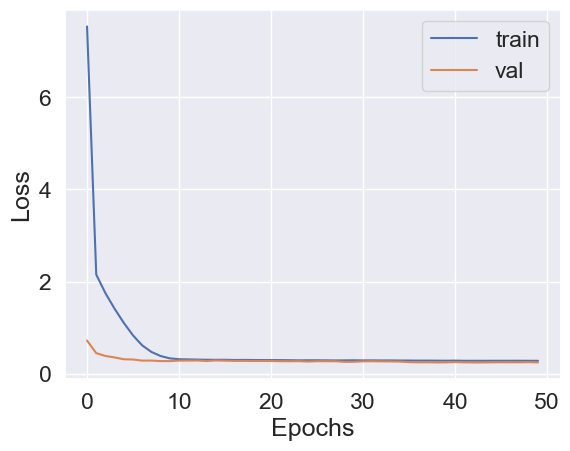

In [104]:
# Model 3: Drop out

#Step1. Define the model3

model3 = Sequential()

model3.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (X_train_scaled_pca.shape[1],)))
model3.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model3.add(Dropout(0.3))
model3.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model3.add(Dropout(0.3))
model3.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model3.add(Dropout(0.3))
model3.add(Dense(1))


#Step2. Compile the model3
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model3.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

#Step3. Fit the model3
history = model3.fit(X_train_scaled_pca, y_train, validation_data=(X_test_scaled_pca, y_test), epochs=50, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model3

loss, mae = model3.evaluate(X_test_scaled_pca, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [114]:
# Step 1: Generate predictions using the trained model
y_pred = model3.predict(X_test_scaled_pca)

# Step 2: Calculate R-squared (R^2) score
mod3r2 = r2_score(y_test, y_pred)
print("Model 3 R-squared (R^2) Score:", mod3r2)

Model 3 R-squared (R^2) Score: 0.5319292126064761


The MAE is **0.3757** and the accuracy is **53%**



**L1/L2 Regularizer** are techniques used to prevent overfitting in machine learning models. They work by adding a penalty term to the loss function, which encourages the model to learn simpler patterns and avoid complex or noisy patterns in the data.

464/464 [==============================] - 0s 308us/step - loss: 0.2608 - mae: 0.3685


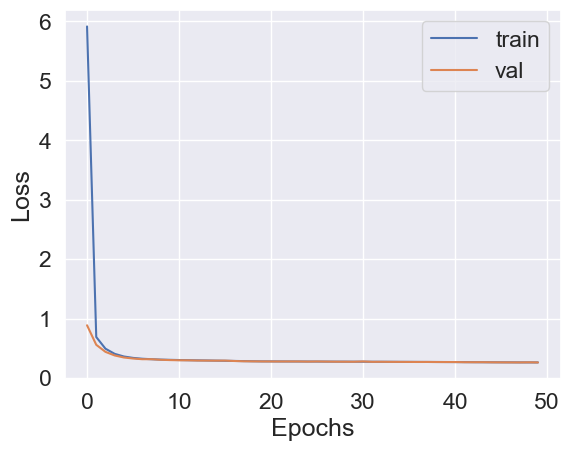

In [106]:
# Model 4: WITH REGULARIZATION 

#Step1. Define the model8

model4 = Sequential()

model4.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (X_train_scaled_pca.shape[1],)))
model4.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = 'l1'))
model4.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = 'l1'))
model4.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = 'l1'))
model4.add(Dense(1))


#Step2. Compile the model8
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model4.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')

#Step3. Fit the model8
history = model4.fit(X_train_scaled_pca, y_train, validation_data=(X_test_scaled_pca, y_test), epochs=50, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model8

loss, mae = model4.evaluate(X_test_scaled_pca, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [115]:
# Step 1: Generate predictions using the trained model
y_pred = model4.predict(X_test_scaled_pca)

# Step 2: Calculate R-squared (R^2) score
mod4r2 = r2_score(y_test, y_pred)
print("Model 4 R-squared (R^2) Score:", mod4r2)

Model 4 R-squared (R^2) Score: 0.5479157969117738


With L1/L2 Regressor, the MAE is **0.3685** and the accuracy is **54%** and the plot seems good.

Plot wise, MAE wise and accuracy wise, model 4 is performing good in neural networks.

In [118]:
print("Linear Regression: " + str(r2_lr))
print("Decision Tree: " + str(dtr_score))
print("Random Forest: " + str(rfr_score))
print("Neural network Model 1:", mod1r2)
print("Neural network Model 2:", mod2r2)
print("Neural network Model 3:", mod3r2)
print("Neural network Model 4:", mod4r2)

Linear Regression: 0.5468814426430769
Decision Tree: 0.6432721921010698
Random Forest: 0.7068652144369286
Neural network Model 1: 0.5567163638568937
Neural network Model 2: 0.5635629682459183
Neural network Model 3: 0.5319292126064761
Neural network Model 4: 0.5479157969117738


The best performing model for this project is **Random Foest Regression** with **70%** accuracy.

### Conclusion

For this problem of predicting prices, indeed the Random Forest method obtained the best score. this means that around 70% of the original variance in the price is explained by the model, which is a very good result. By importance feature, it is found out that `room_type` is the feature that is triggering the Airbnb prices.

By using this model, Airbnb could make targeted price recommendations to hosts in order to maximize revenue both for Airbnb and for the host. At the same time, users can use this model to check if the property is overvalued or undervalued with respect to the market.